In [1]:
import numpy as np
import scipy
import scipy.stats
import torch as t

import matplotlib.pyplot as plt
from IPython.display import clear_output, display

from torch.nn import Sequential, Linear, ReLU, LeakyReLU, Dropout, Sigmoid

In [2]:
%matplotlib inline

In [3]:
device=t.device('cpu') #Overrride the above device choice

### Generate the sample 2D distribution: uniform from unit circle.  

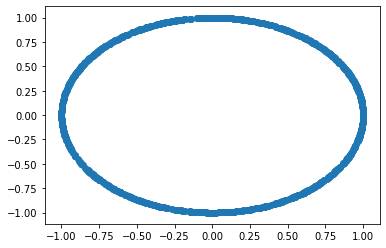

In [4]:
angle = np.random.uniform(-np.pi,np.pi,(1000,1)).astype('float32')
data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)
plt.scatter(data[:,0], data[:,1])

### GAN implementation

In [5]:
discriminator = Sequential(
    Linear(2,50),  
    LeakyReLU(0.2),
    Linear(50, 1), 
    Sigmoid()
) #dummy discriminator: please subsitute you own implementation 

In [6]:
generator = Sequential(
    Linear(2,1000),
    LeakyReLU(0.1),
    
    Linear(1000,500),
    LeakyReLU(0.1),
    
    Linear(500,200),
    LeakyReLU(0.1),
    
    Linear(200,100),
    LeakyReLU(0.1),
    
    Linear(100,100),
    LeakyReLU(0.1),
    
    Linear(100,50),
    LeakyReLU(0.1),
    
    Linear(50, 2),
    LeakyReLU(0.1),
)# dummy generator: please subsitute you own implementation 

In [7]:
discriminator = discriminator.to(device) 
generator= generator.to(device)

d_optimizer = t.optim.Adam(discriminator.parameters(), lr=0.001)
g_optimizer = t.optim.Adam(generator.parameters(), lr=0.002)

loss = t.nn.BCELoss()

## Starting here

In [8]:
def real_data_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = t.ones(size, 1)

    return data

def fake_data_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = t.zeros(size, 1)

    return data

In [9]:
def train_discriminator(optimizer, real_data, fake_data):
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    
    error_real = loss(prediction_real, real_data_target(real_data.size(0)))
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, fake_data_target(real_data.size(0)))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error
    return error_real + error_fake

In [10]:
def train_generator(optimizer, fake_data):
    # 2. Train Generator
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, real_data_target(prediction.size(0)))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [11]:
def show(noise, fake, real):
    
    fig, axs = plt.subplots(1,3, figsize = (12,4))
    
    axs[0].set_title("noise")
    axs[1].set_title("fake")
    axs[2].set_title("real")
    
    axs[0].scatter(noise.data.cpu().numpy()[:,0],noise.data.cpu().numpy()[:,1], color = 'gray')
    axs[1].scatter(fake.data.cpu().numpy()[:,0], fake.data.cpu().numpy()[:,1], color = 'red')
    axs[2].scatter(real.data.cpu().numpy()[:,0], real.data.cpu().numpy()[:,1], color = 'green')

    fig.tight_layout()
    plt.show()

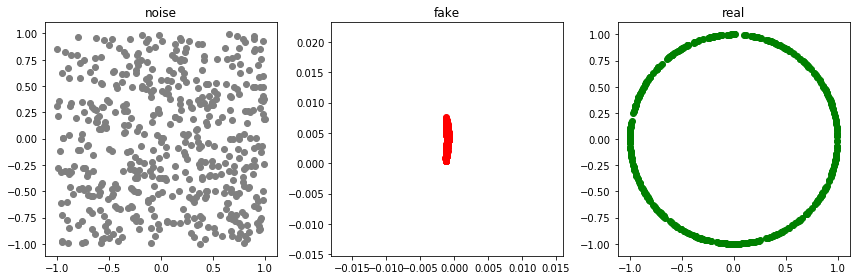

Epoch: 0 G-error: 0.634459376335144 D-error: 1.42518949508667


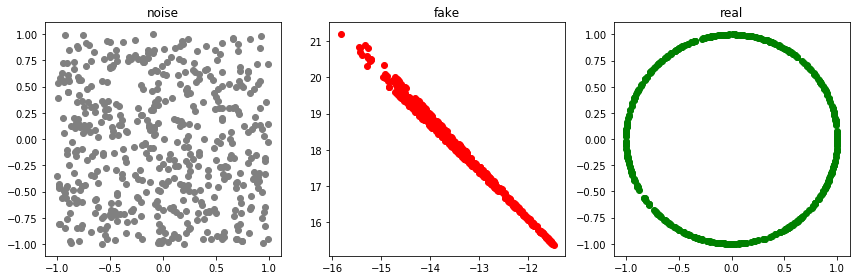

Epoch: 100 G-error: 0.10883904248476028 D-error: 3.0941085815429688


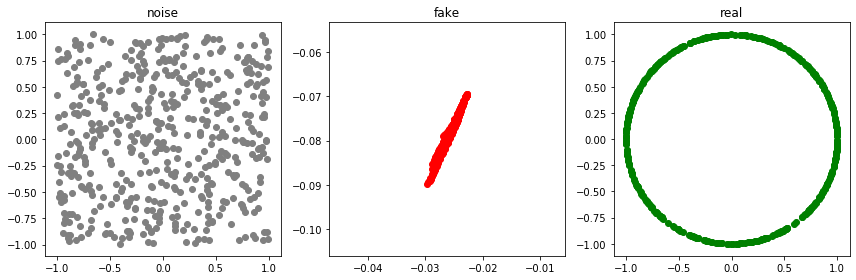

Epoch: 200 G-error: 0.7174677848815918 D-error: 1.4257442951202393


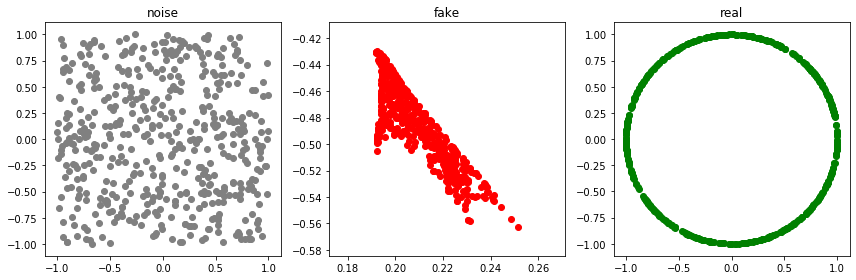

Epoch: 300 G-error: 0.7117534279823303 D-error: 1.4168925285339355


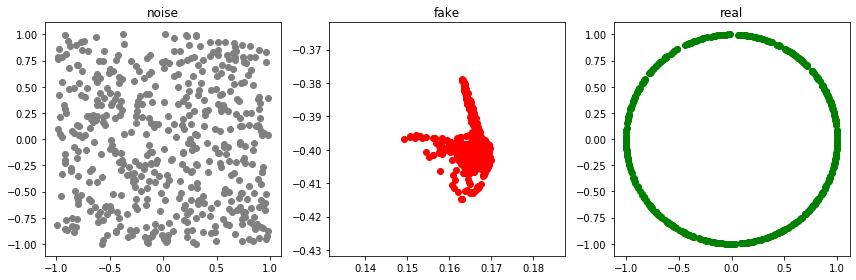

Epoch: 400 G-error: 0.7118214964866638 D-error: 1.3979856967926025


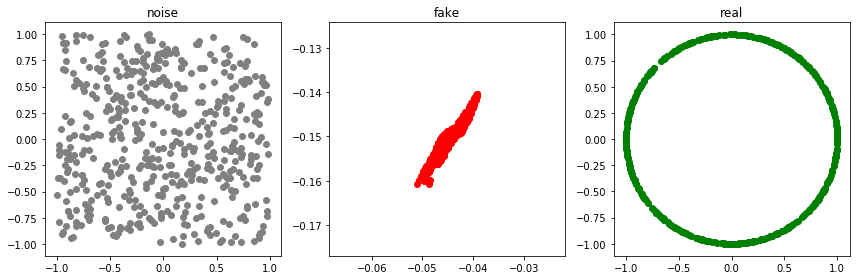

Epoch: 500 G-error: 0.716369092464447 D-error: 1.3839764595031738


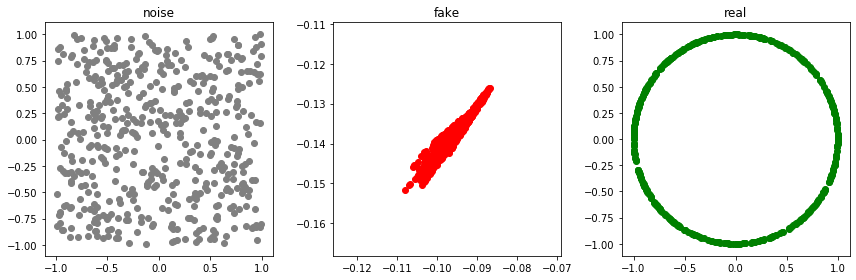

Epoch: 600 G-error: 0.7220783829689026 D-error: 1.3691598176956177


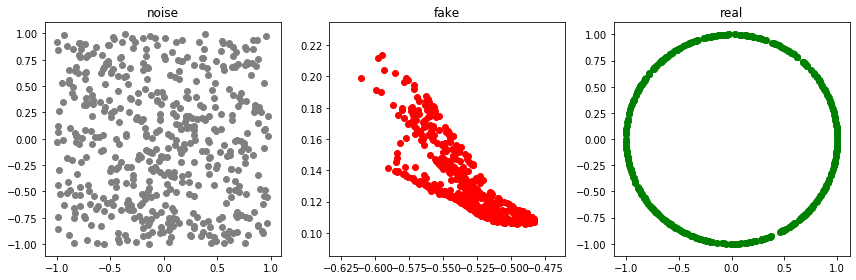

Epoch: 700 G-error: 0.7132880091667175 D-error: 1.3710845708847046


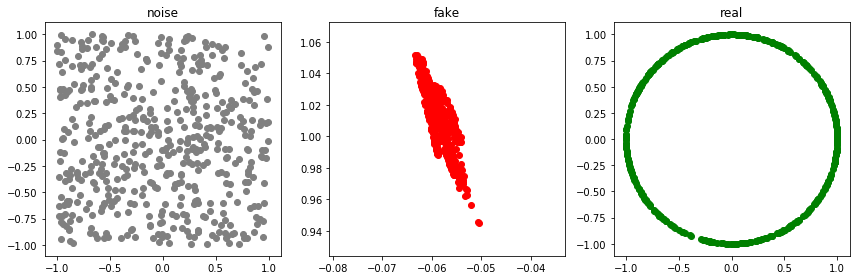

Epoch: 800 G-error: 0.6998810768127441 D-error: 1.384072184562683


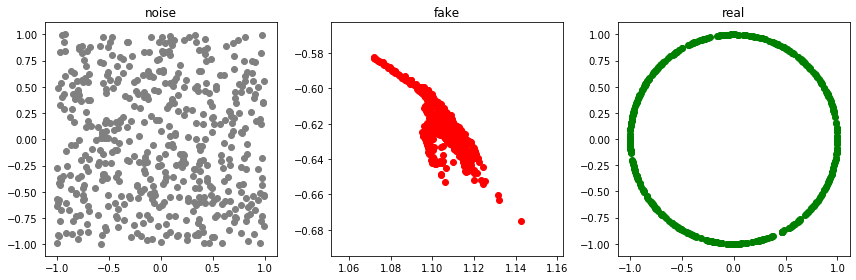

Epoch: 900 G-error: 0.6601603627204895 D-error: 1.4255571365356445


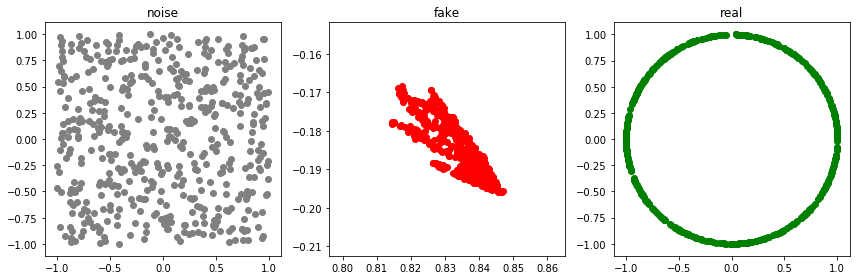

Epoch: 1000 G-error: 0.694463312625885 D-error: 1.365335464477539


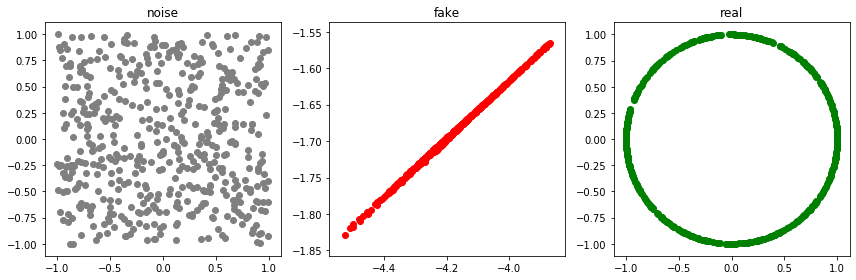

Epoch: 1100 G-error: 0.6482511162757874 D-error: 1.427558183670044


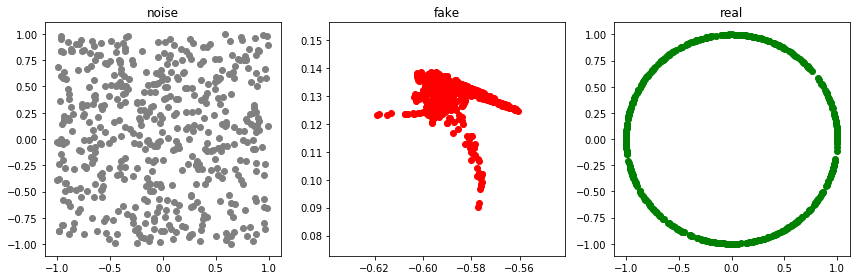

Epoch: 1200 G-error: 0.7140281200408936 D-error: 1.3763070106506348


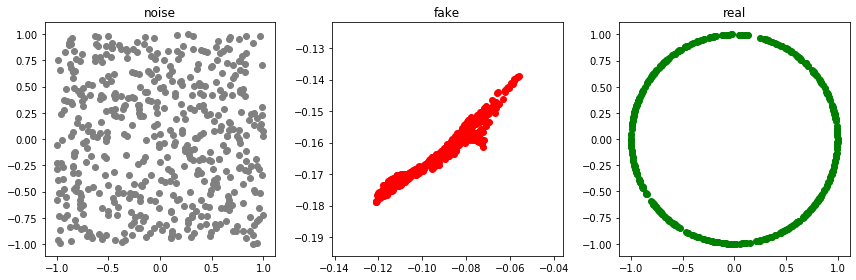

Epoch: 1300 G-error: 0.7240192890167236 D-error: 1.360605239868164


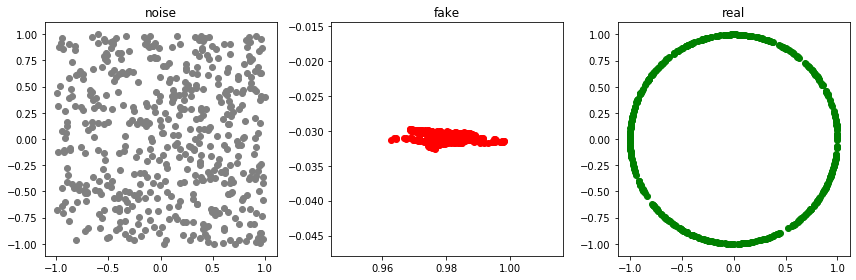

Epoch: 1400 G-error: 0.6895069479942322 D-error: 1.382890224456787


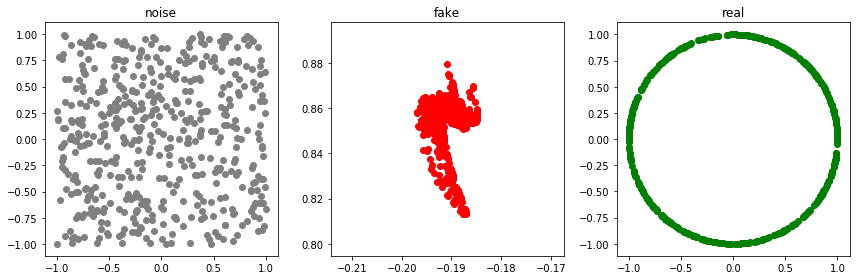

Epoch: 1500 G-error: 0.7332451343536377 D-error: 1.3611767292022705


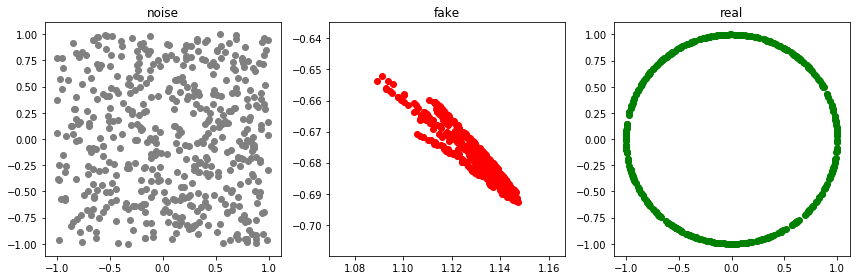

Epoch: 1600 G-error: 0.6956361532211304 D-error: 1.3782505989074707


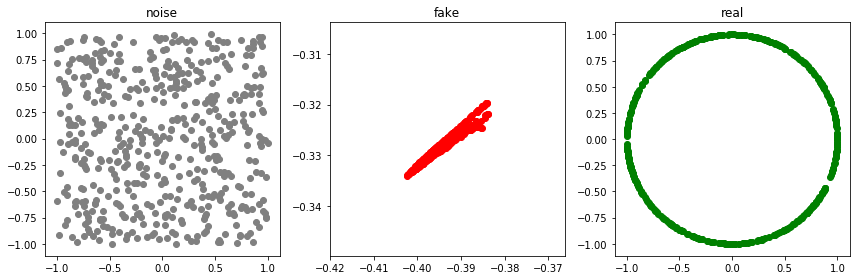

Epoch: 1700 G-error: 0.706633985042572 D-error: 1.360069751739502


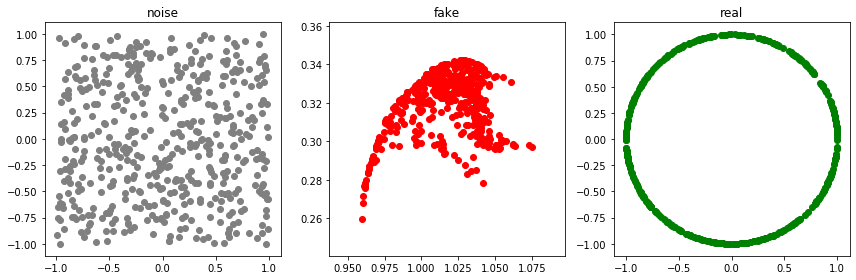

Epoch: 1800 G-error: 0.685977578163147 D-error: 1.4088857173919678


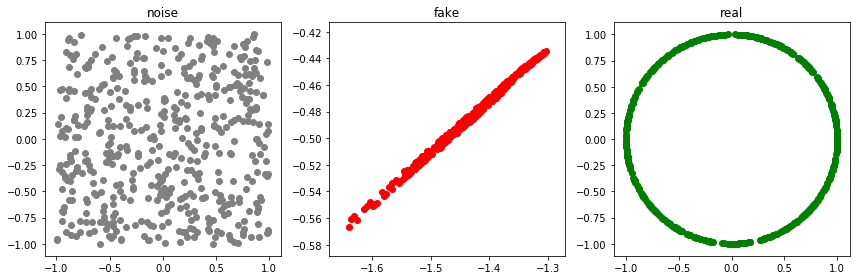

Epoch: 1900 G-error: 0.6812343597412109 D-error: 1.4083364009857178


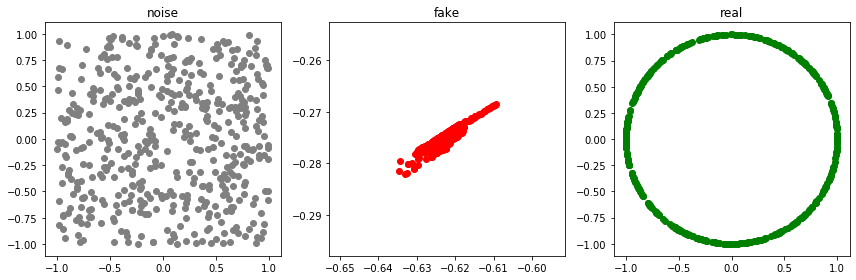

Epoch: 2000 G-error: 0.7290517687797546 D-error: 1.358205795288086


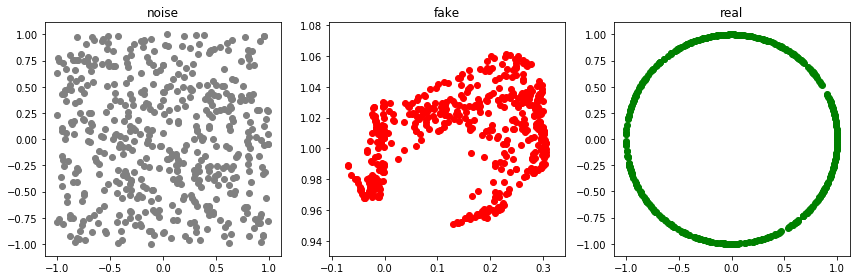

Epoch: 2100 G-error: 0.651939868927002 D-error: 1.4232051372528076


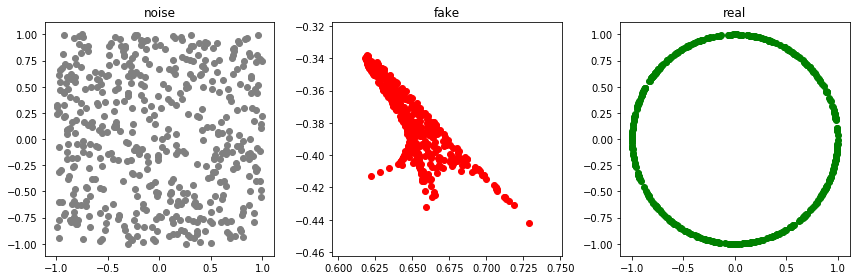

Epoch: 2200 G-error: 0.6881522536277771 D-error: 1.3936598300933838


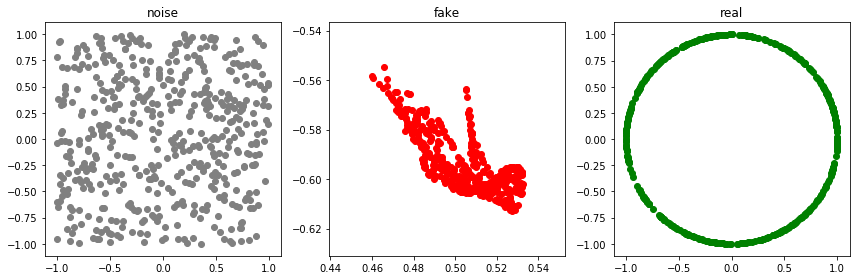

Epoch: 2300 G-error: 0.6875540018081665 D-error: 1.3780479431152344


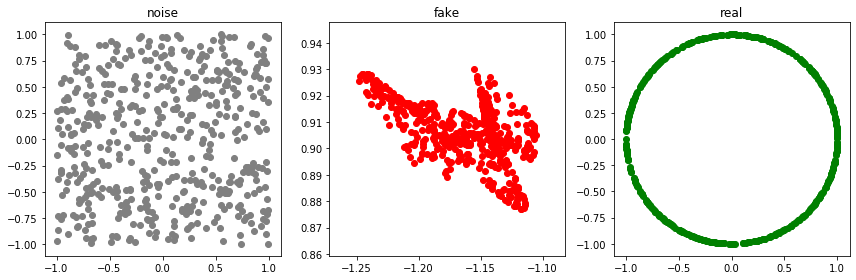

Epoch: 2400 G-error: 0.6753209233283997 D-error: 1.4131014347076416


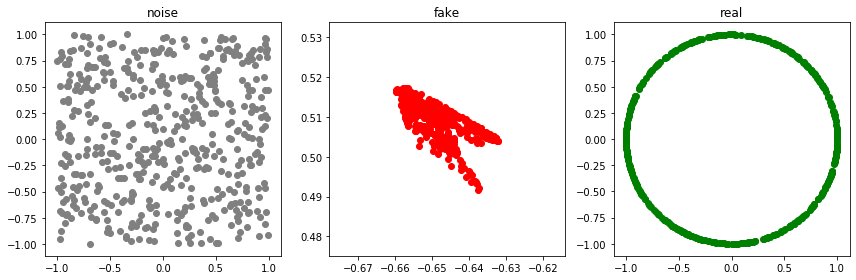

Epoch: 2500 G-error: 0.736460268497467 D-error: 1.3578243255615234


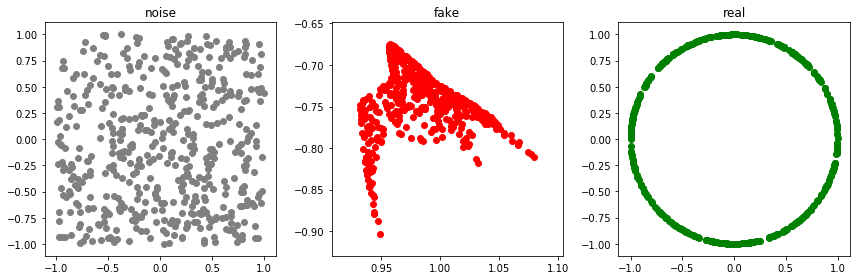

Epoch: 2600 G-error: 0.6572056412696838 D-error: 1.4213817119598389


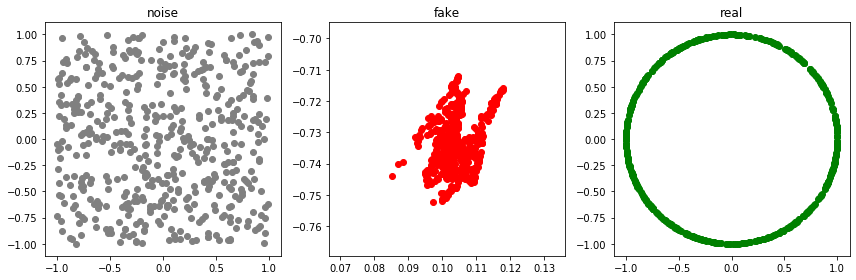

Epoch: 2700 G-error: 0.7175676226615906 D-error: 1.3425590991973877


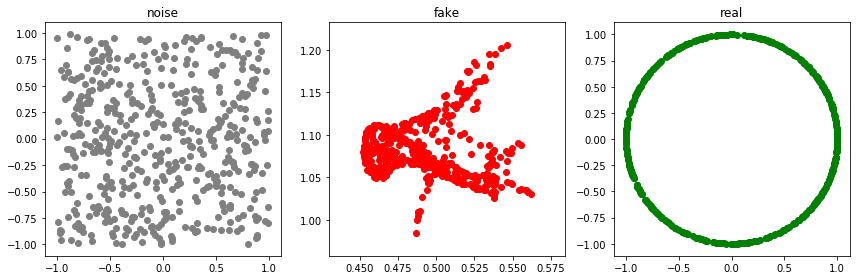

Epoch: 2800 G-error: 0.6560526490211487 D-error: 1.435168743133545


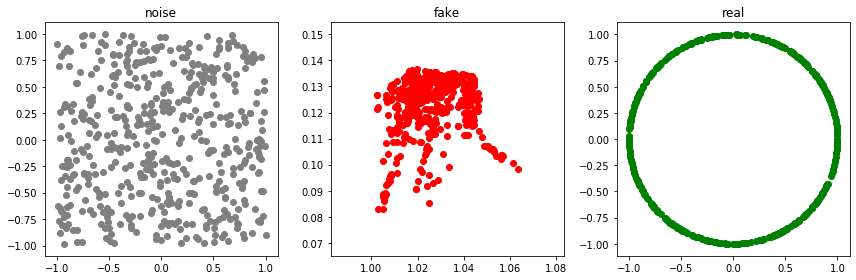

Epoch: 2900 G-error: 0.7169052362442017 D-error: 1.3635828495025635


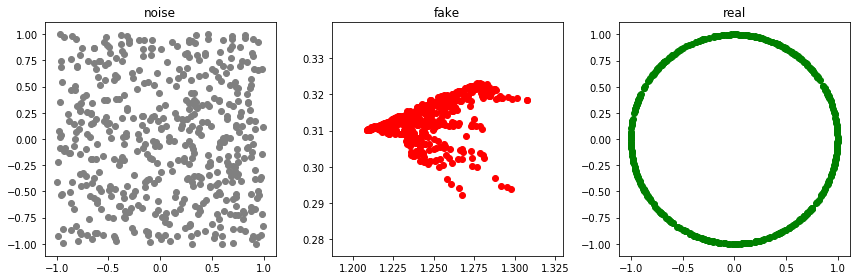

Epoch: 3000 G-error: 0.6722697019577026 D-error: 1.4308844804763794


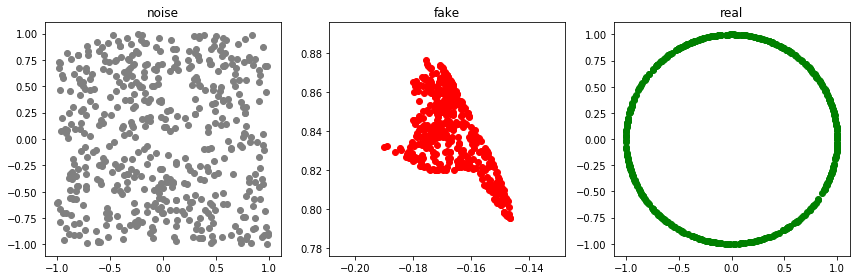

Epoch: 3100 G-error: 0.6953683495521545 D-error: 1.3902658224105835


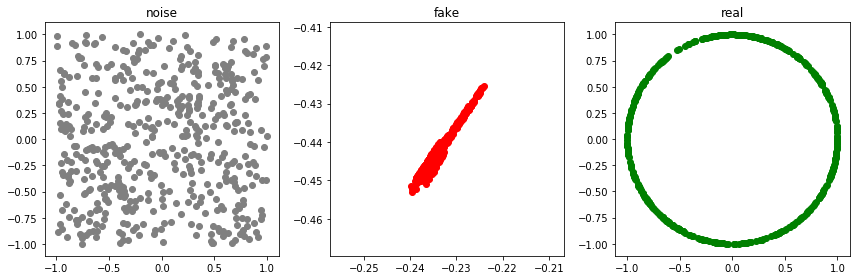

Epoch: 3200 G-error: 0.7031036019325256 D-error: 1.3659977912902832


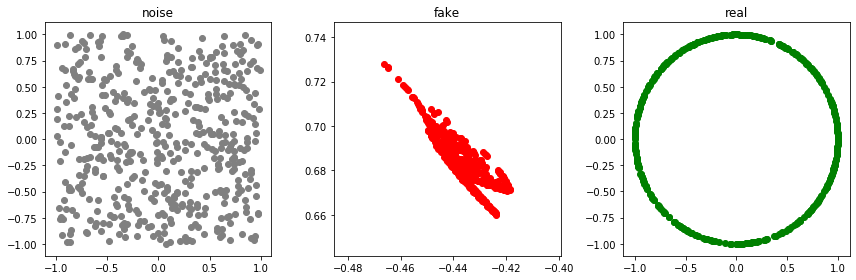

Epoch: 3300 G-error: 0.7265573740005493 D-error: 1.3812543153762817


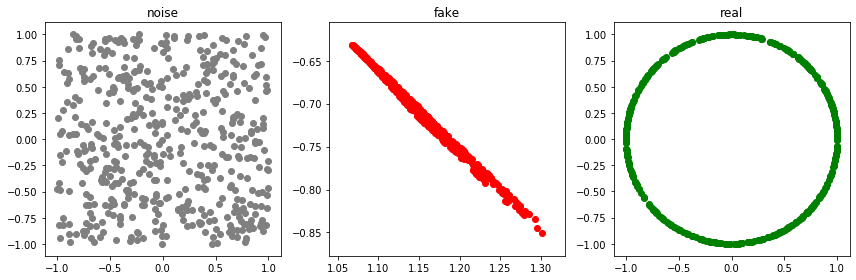

Epoch: 3400 G-error: 0.6499505043029785 D-error: 1.4273983240127563


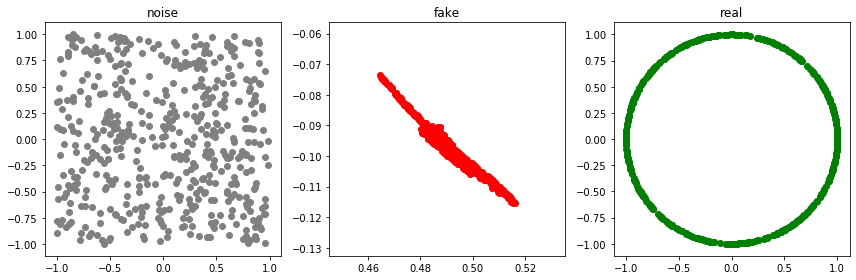

Epoch: 3500 G-error: 0.7154561877250671 D-error: 1.3393932580947876


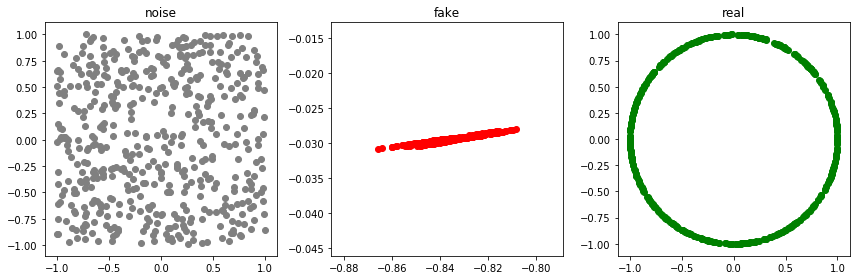

Epoch: 3600 G-error: 0.7139517664909363 D-error: 1.3797707557678223


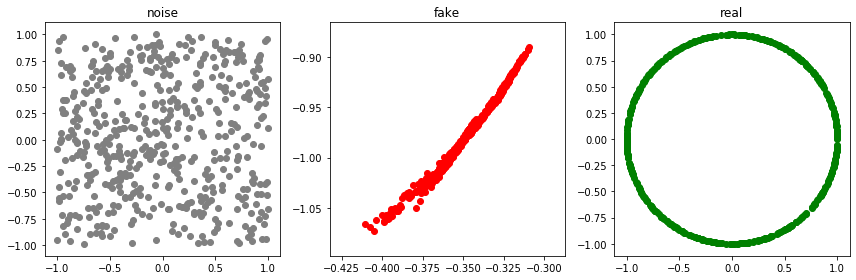

Epoch: 3700 G-error: 0.6764700412750244 D-error: 1.4049019813537598


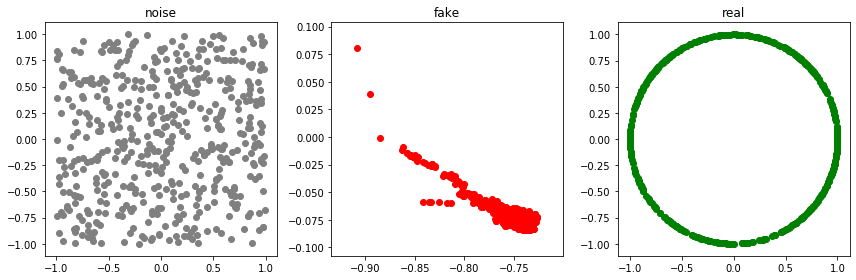

Epoch: 3800 G-error: 0.6848834156990051 D-error: 1.3656039237976074


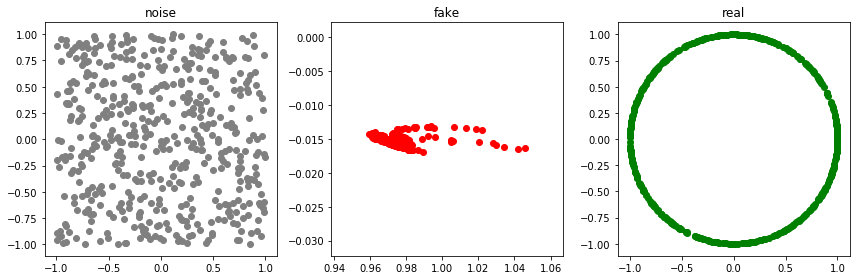

Epoch: 3900 G-error: 0.725338876247406 D-error: 1.3634892702102661


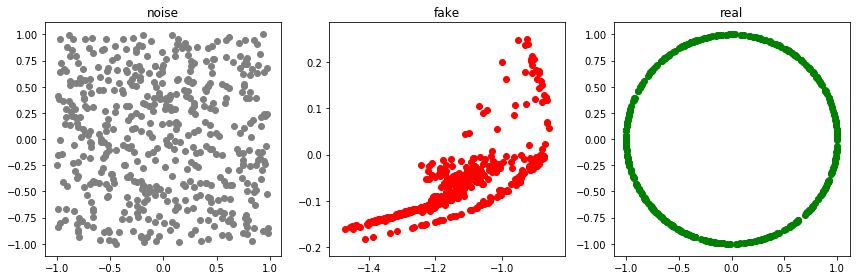

Epoch: 4000 G-error: 0.6542400121688843 D-error: 1.4348276853561401


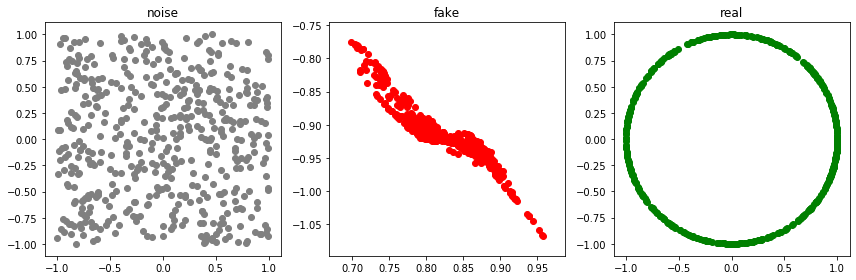

Epoch: 4100 G-error: 0.6533999443054199 D-error: 1.4268527030944824


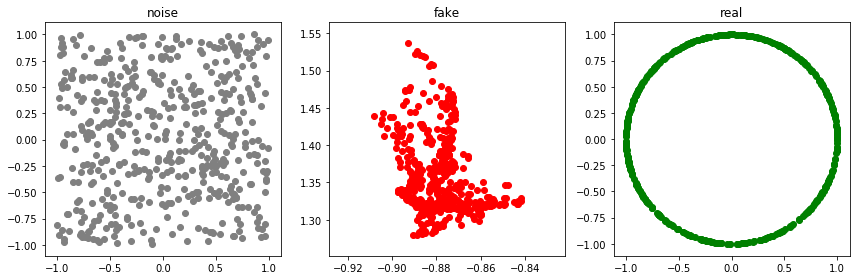

Epoch: 4200 G-error: 0.6385168433189392 D-error: 1.4281328916549683


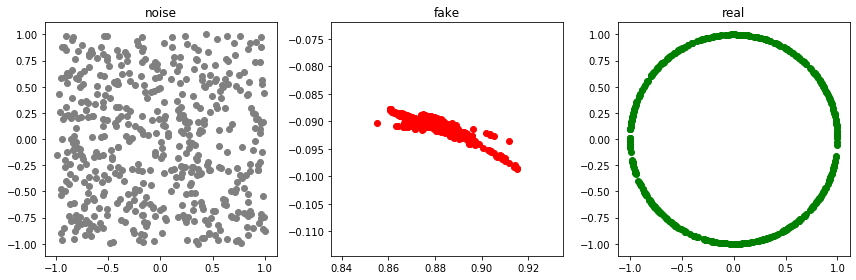

Epoch: 4300 G-error: 0.7242094874382019 D-error: 1.3590755462646484


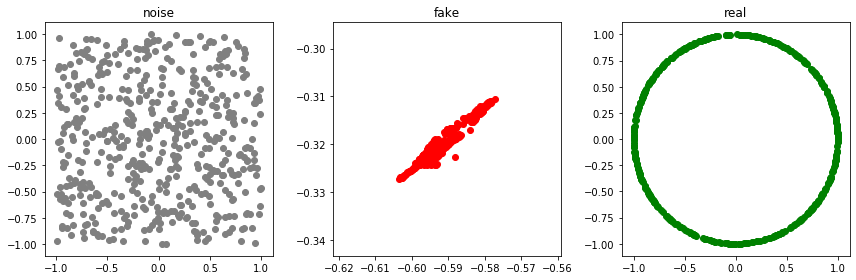

Epoch: 4400 G-error: 0.7186232805252075 D-error: 1.3610074520111084


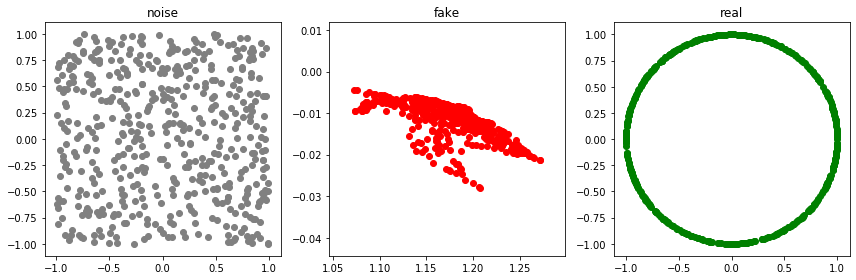

Epoch: 4500 G-error: 0.6821432113647461 D-error: 1.4167485237121582


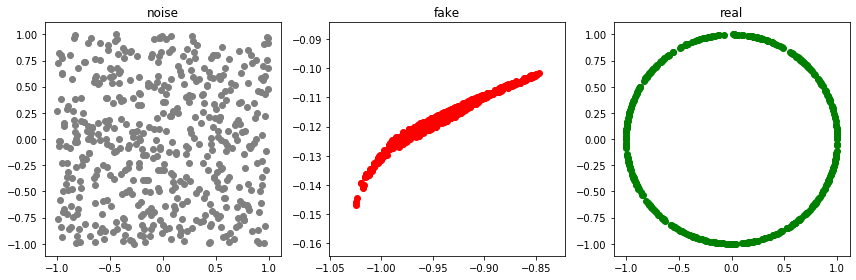

Epoch: 4600 G-error: 0.6973622441291809 D-error: 1.3955342769622803


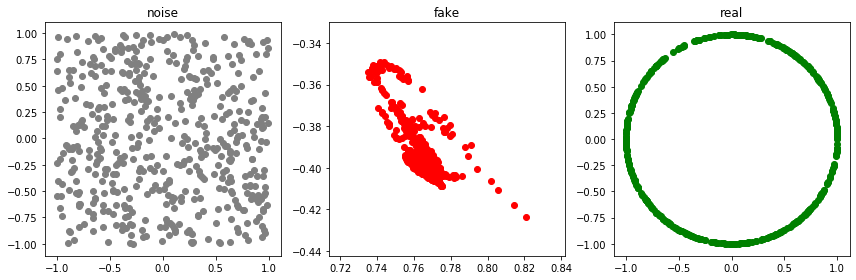

Epoch: 4700 G-error: 0.70514315366745 D-error: 1.3529099225997925


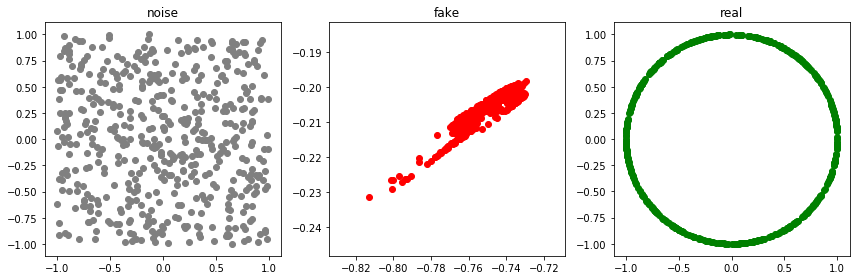

Epoch: 4800 G-error: 0.7313266396522522 D-error: 1.3753888607025146


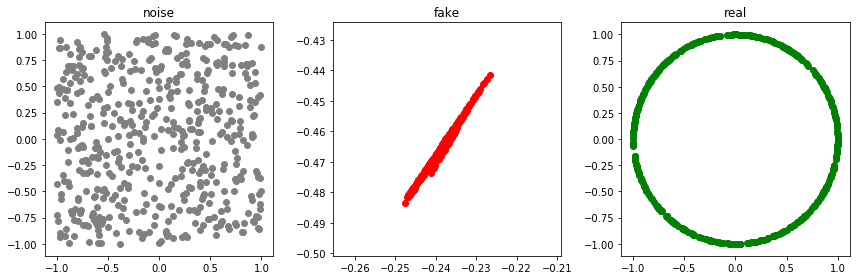

Epoch: 4900 G-error: 0.7241010069847107 D-error: 1.3175851106643677


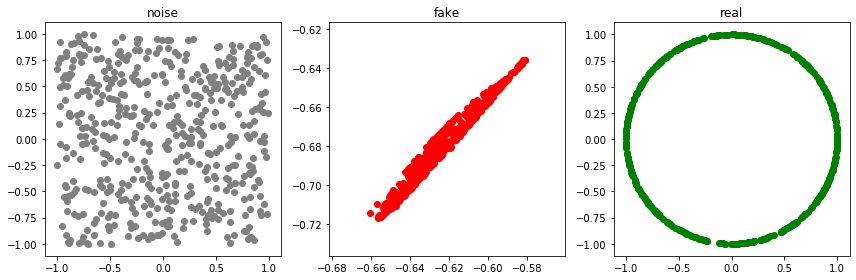

Epoch: 5000 G-error: 0.7012127637863159 D-error: 1.401149868965149


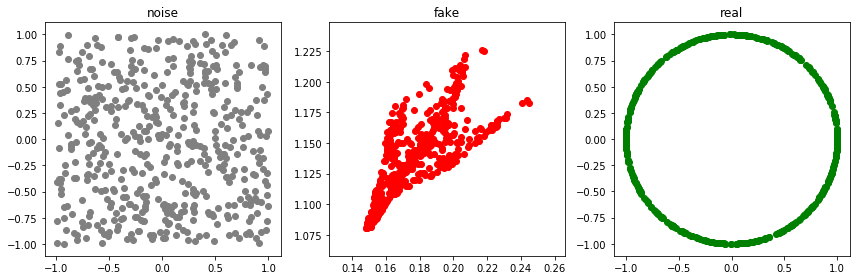

Epoch: 5100 G-error: 0.635649561882019 D-error: 1.4507179260253906


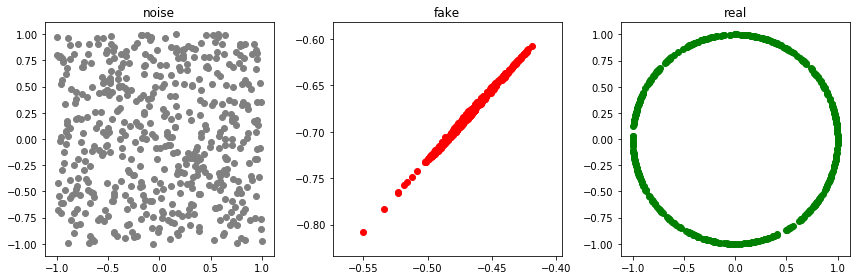

Epoch: 5200 G-error: 0.7226456999778748 D-error: 1.3433260917663574


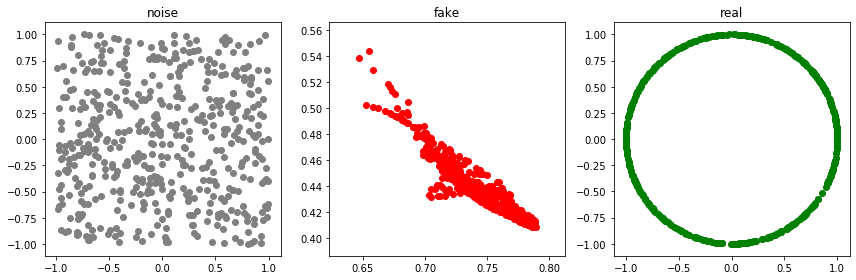

Epoch: 5300 G-error: 0.7181392908096313 D-error: 1.3680596351623535


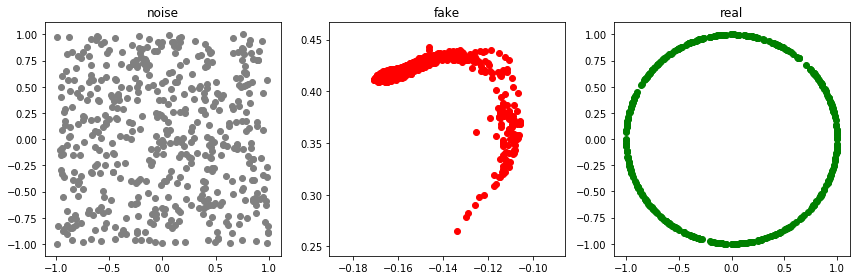

Epoch: 5400 G-error: 0.73896324634552 D-error: 1.3537284135818481


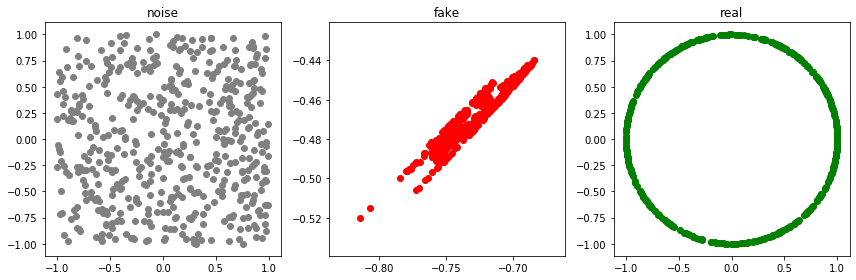

Epoch: 5500 G-error: 0.720402181148529 D-error: 1.3339977264404297


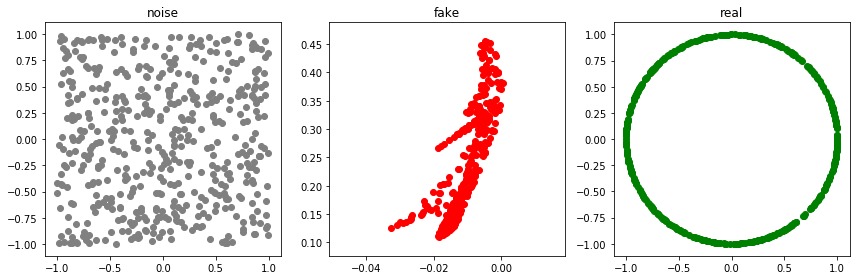

Epoch: 5600 G-error: 0.7127297520637512 D-error: 1.3563463687896729


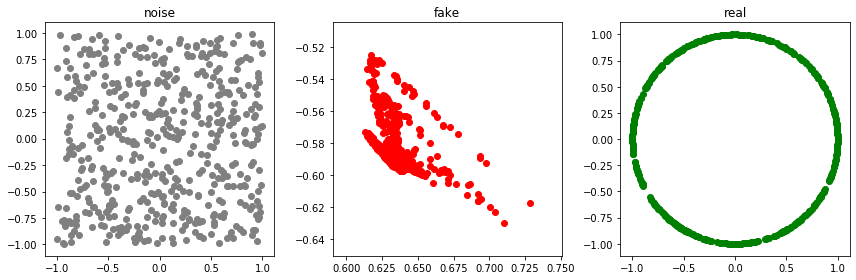

Epoch: 5700 G-error: 0.6997994780540466 D-error: 1.3678219318389893


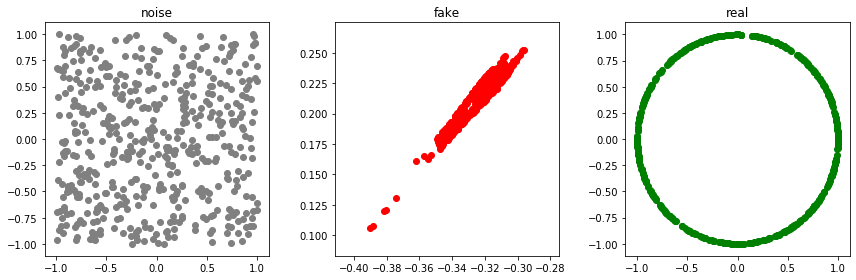

Epoch: 5800 G-error: 0.7644258737564087 D-error: 1.3396480083465576


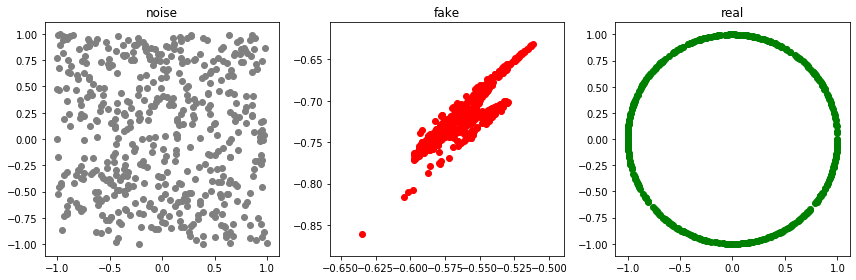

Epoch: 5900 G-error: 0.7331980466842651 D-error: 1.3222463130950928


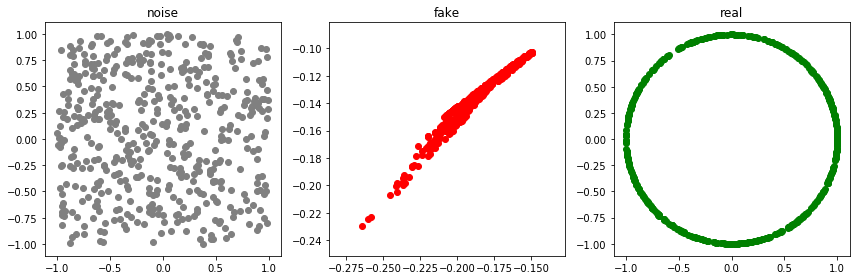

Epoch: 6000 G-error: 0.7175781726837158 D-error: 1.3591961860656738


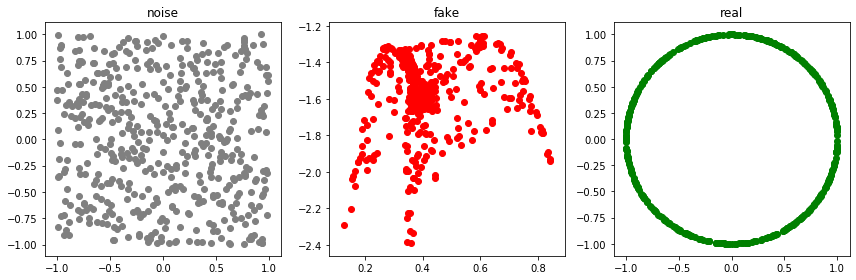

Epoch: 6100 G-error: 0.6523414850234985 D-error: 1.4420868158340454


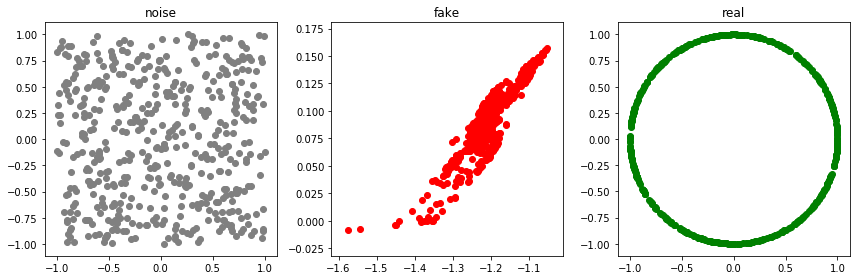

Epoch: 6200 G-error: 0.7006627917289734 D-error: 1.4075102806091309


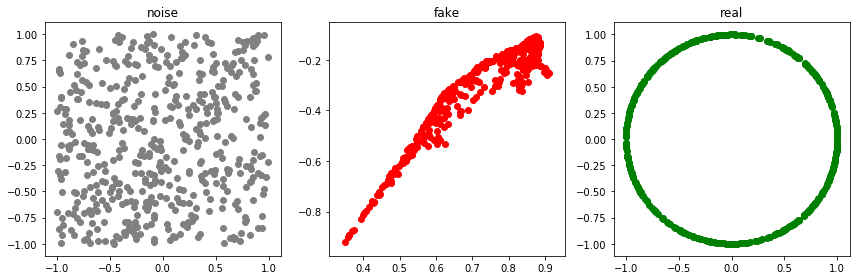

Epoch: 6300 G-error: 0.7105298042297363 D-error: 1.3724915981292725


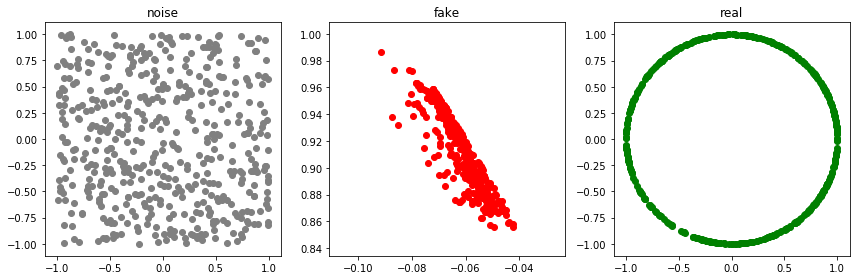

Epoch: 6400 G-error: 0.672468900680542 D-error: 1.4229121208190918


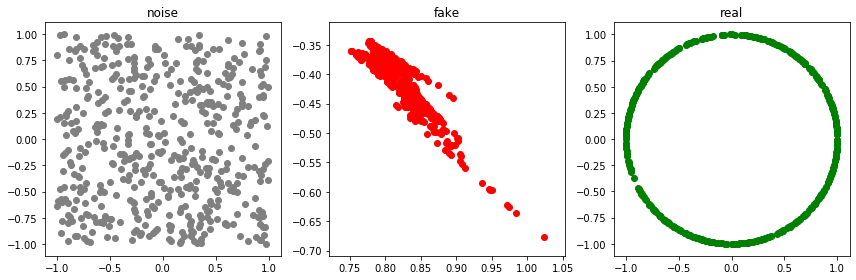

Epoch: 6500 G-error: 0.7053695917129517 D-error: 1.3765720129013062


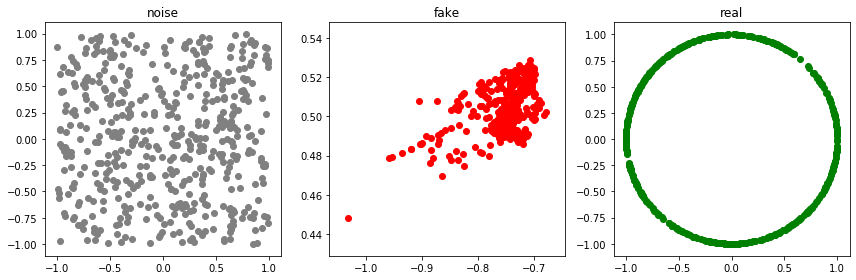

Epoch: 6600 G-error: 0.7375372052192688 D-error: 1.3839778900146484


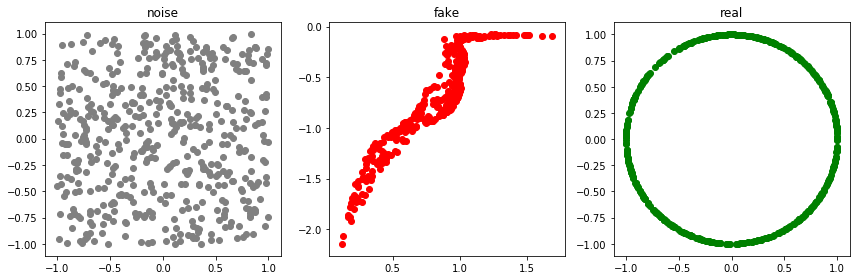

Epoch: 6700 G-error: 0.6263833045959473 D-error: 1.4472260475158691


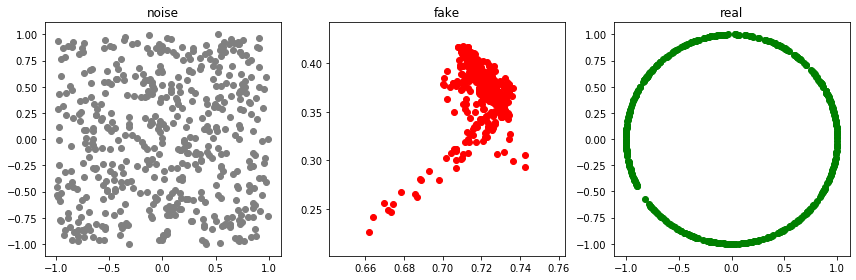

Epoch: 6800 G-error: 0.7540867328643799 D-error: 1.3405323028564453


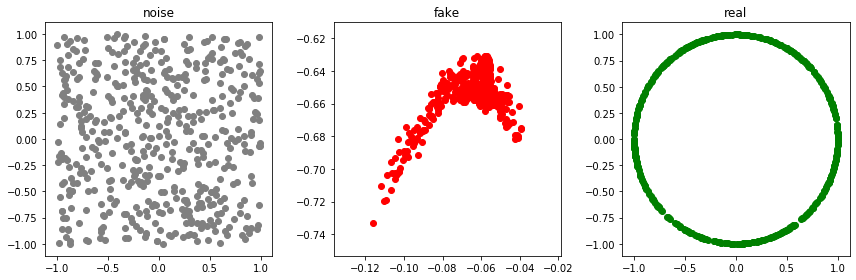

Epoch: 6900 G-error: 0.7401334643363953 D-error: 1.3242948055267334


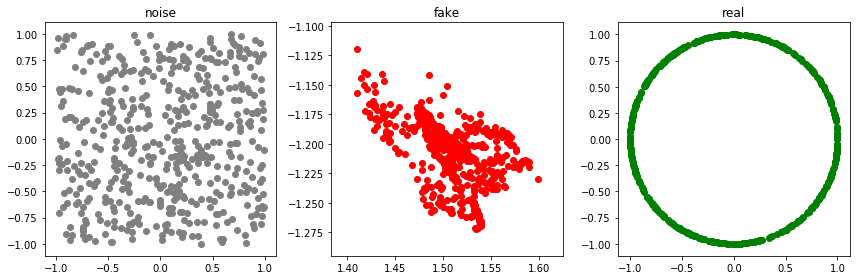

Epoch: 7000 G-error: 0.6296827793121338 D-error: 1.4738693237304688


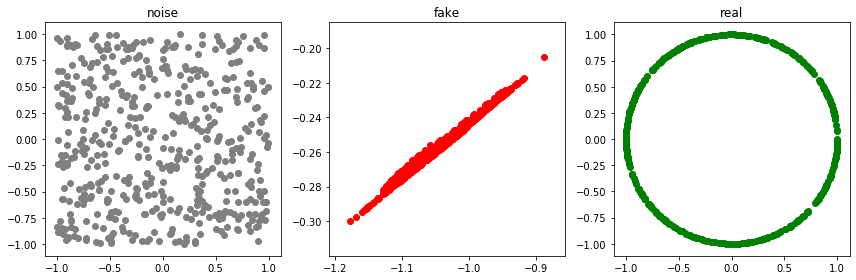

Epoch: 7100 G-error: 0.7081534266471863 D-error: 1.4043521881103516


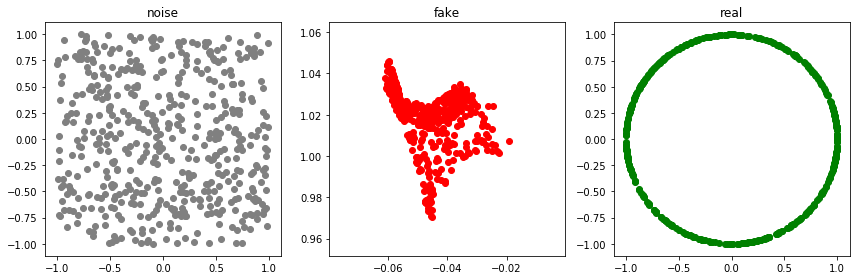

Epoch: 7200 G-error: 0.6501497030258179 D-error: 1.436967372894287


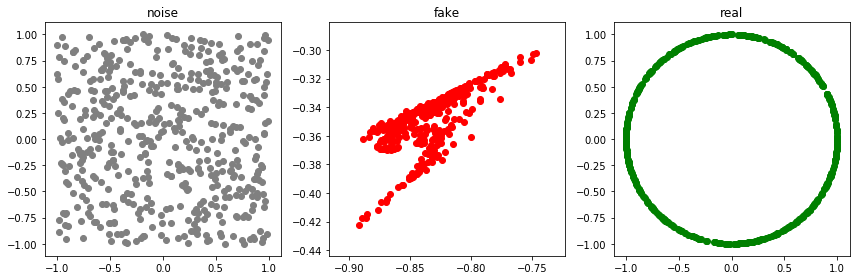

Epoch: 7300 G-error: 0.7430460453033447 D-error: 1.3366847038269043


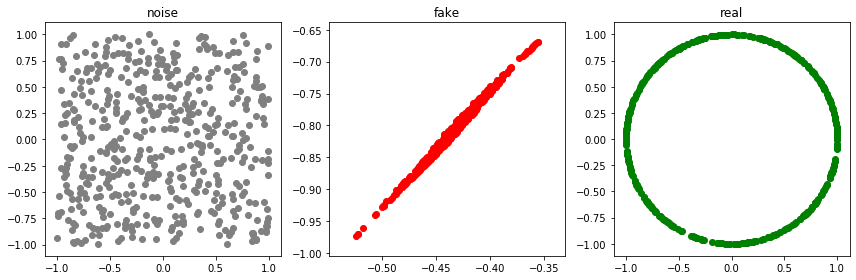

Epoch: 7400 G-error: 0.704349935054779 D-error: 1.3714661598205566


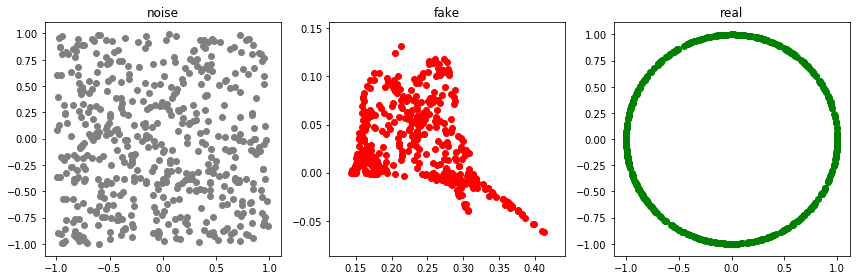

Epoch: 7500 G-error: 0.6840533018112183 D-error: 1.3788788318634033


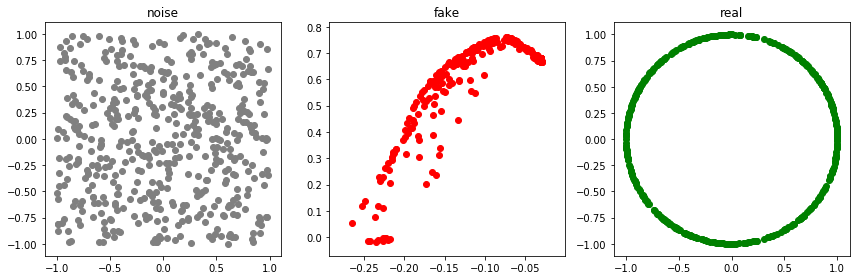

Epoch: 7600 G-error: 0.6021084785461426 D-error: 1.455723762512207


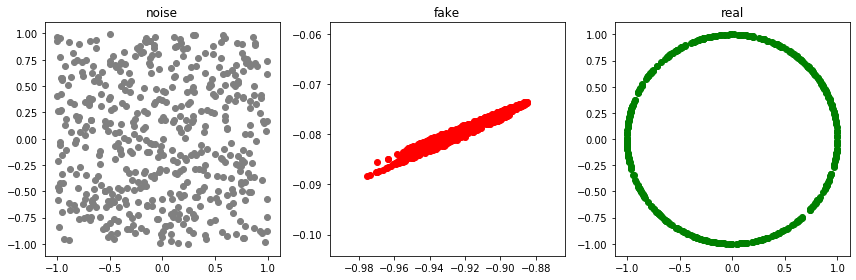

Epoch: 7700 G-error: 0.7013681530952454 D-error: 1.3984514474868774


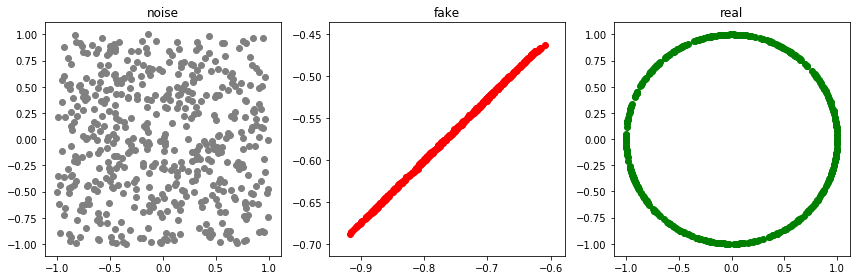

Epoch: 7800 G-error: 0.6794393062591553 D-error: 1.4048981666564941


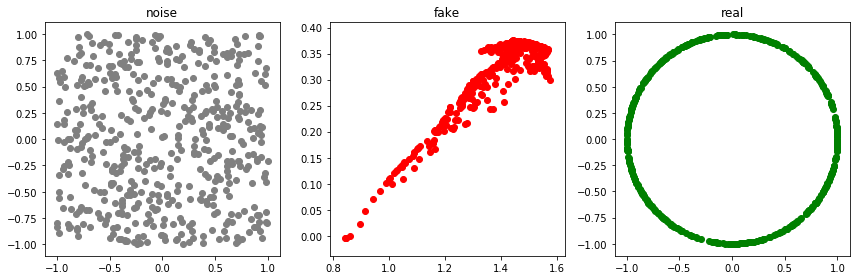

Epoch: 7900 G-error: 0.6129449605941772 D-error: 1.4586855173110962


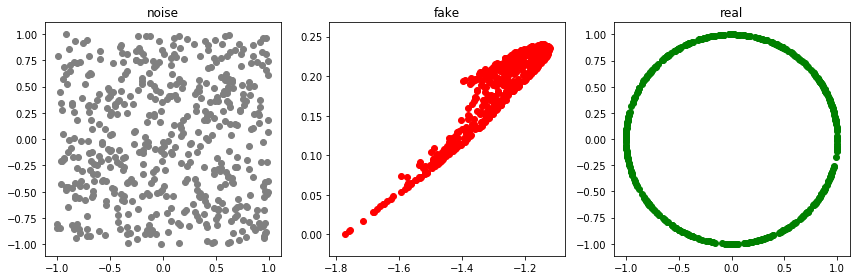

Epoch: 8000 G-error: 0.6227598190307617 D-error: 1.4681103229522705


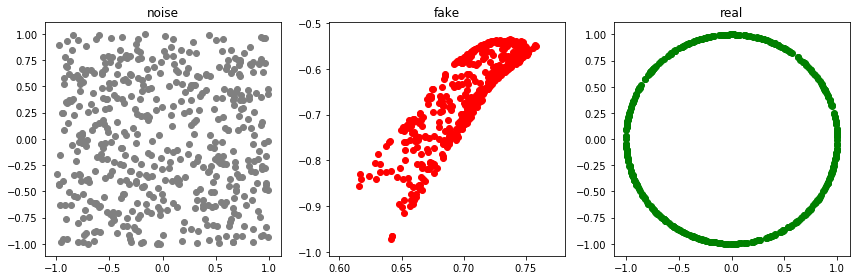

Epoch: 8100 G-error: 0.7153235673904419 D-error: 1.379168152809143


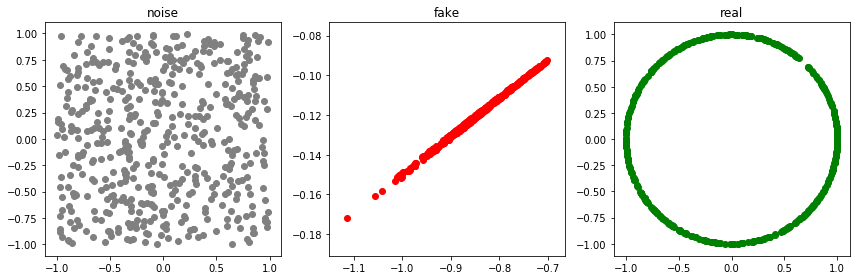

Epoch: 8200 G-error: 0.7246384024620056 D-error: 1.3801894187927246


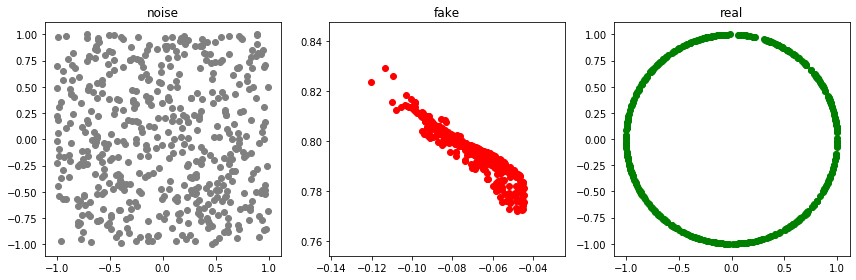

Epoch: 8300 G-error: 0.7636433839797974 D-error: 1.3396519422531128


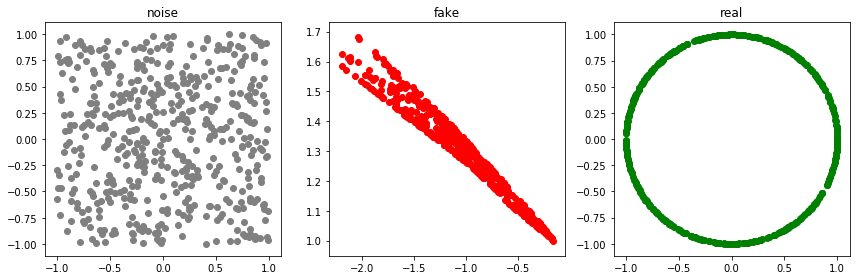

Epoch: 8400 G-error: 0.5724543333053589 D-error: 1.5131988525390625


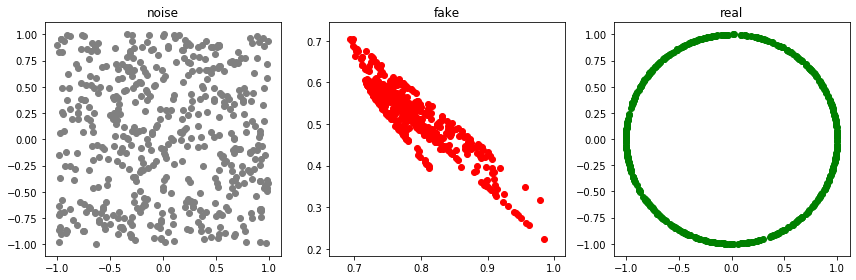

Epoch: 8500 G-error: 0.6965713500976562 D-error: 1.3971881866455078


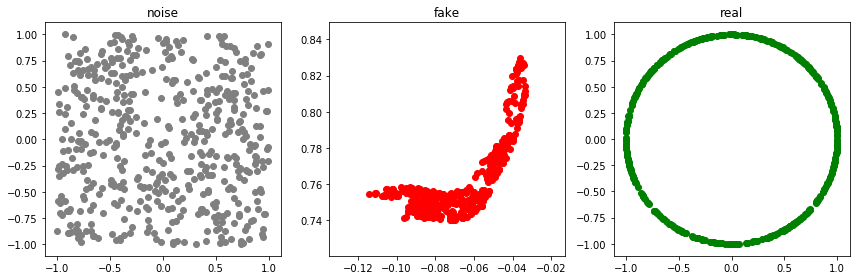

Epoch: 8600 G-error: 0.6468552350997925 D-error: 1.4281110763549805


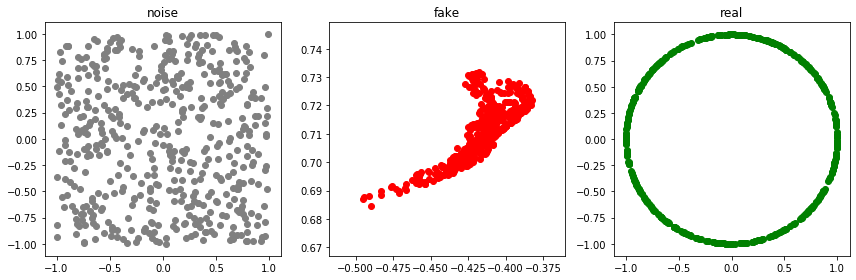

Epoch: 8700 G-error: 0.7523828744888306 D-error: 1.3455760478973389


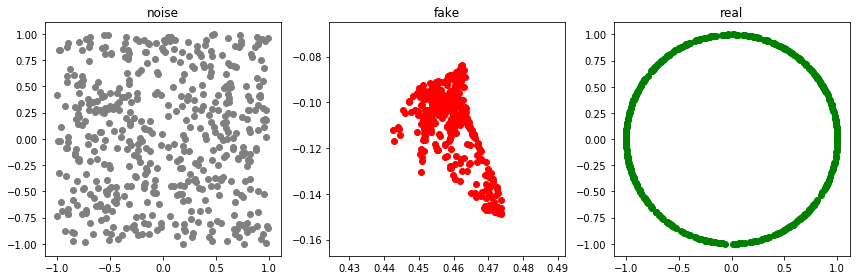

Epoch: 8800 G-error: 0.7546122670173645 D-error: 1.3018919229507446


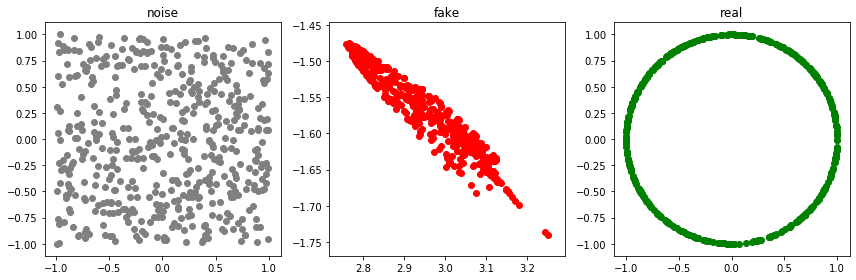

Epoch: 8900 G-error: 0.7004671096801758 D-error: 1.3854970932006836


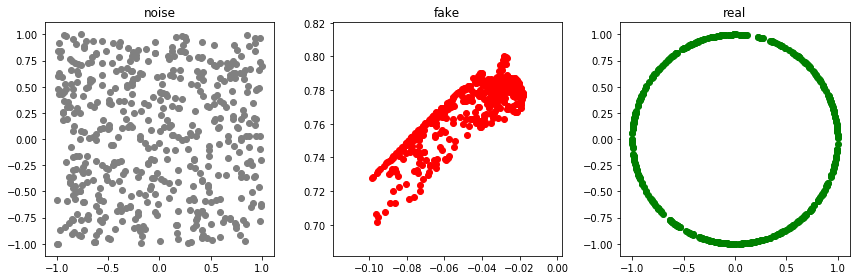

Epoch: 9000 G-error: 0.7845868468284607 D-error: 1.3152923583984375


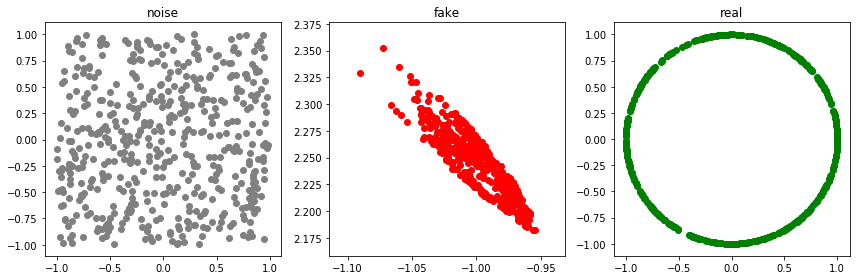

Epoch: 9100 G-error: 0.5725980997085571 D-error: 1.5227298736572266


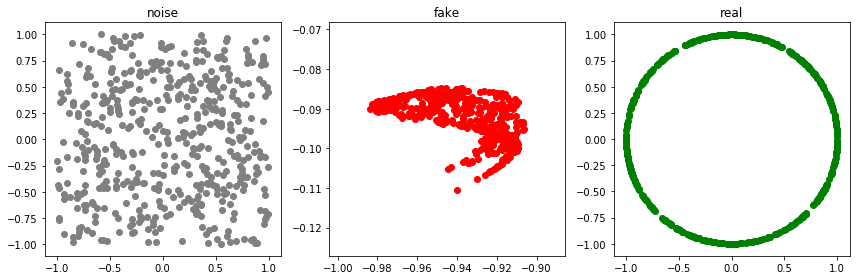

Epoch: 9200 G-error: 0.7293152213096619 D-error: 1.3659318685531616


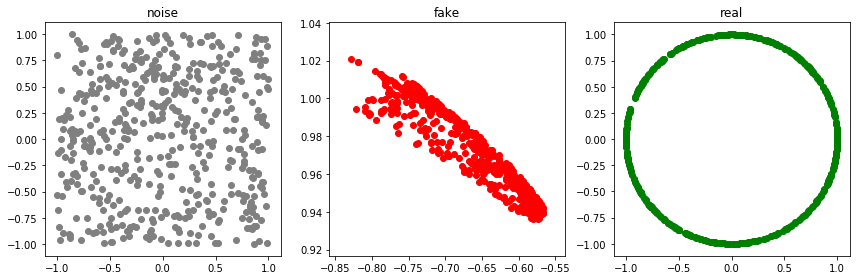

Epoch: 9300 G-error: 0.6679919362068176 D-error: 1.4290084838867188


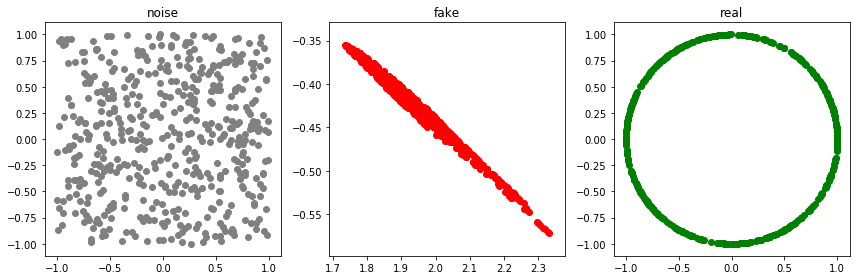

Epoch: 9400 G-error: 0.5839146375656128 D-error: 1.520477294921875


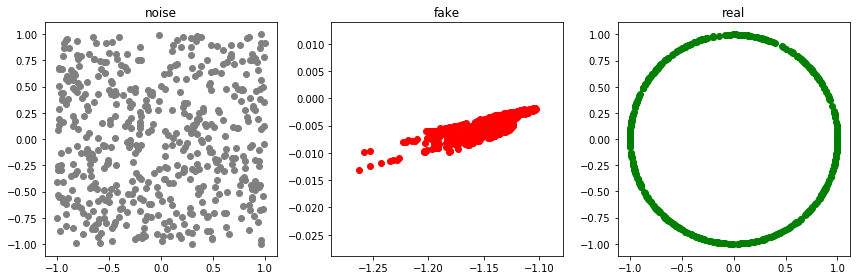

Epoch: 9500 G-error: 0.6823959946632385 D-error: 1.4072072505950928


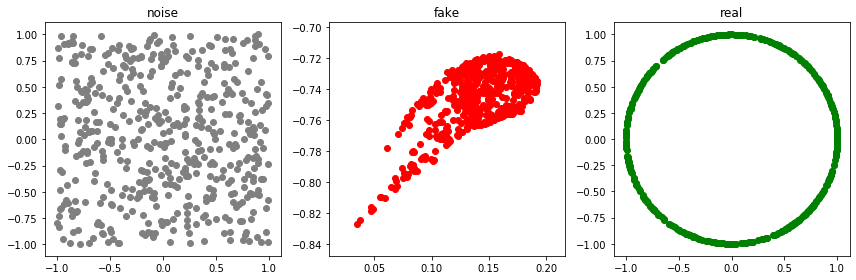

Epoch: 9600 G-error: 0.7640065550804138 D-error: 1.321610689163208


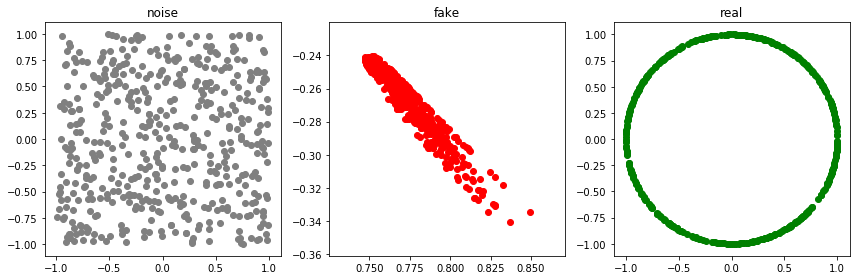

Epoch: 9700 G-error: 0.6198971271514893 D-error: 1.461859941482544


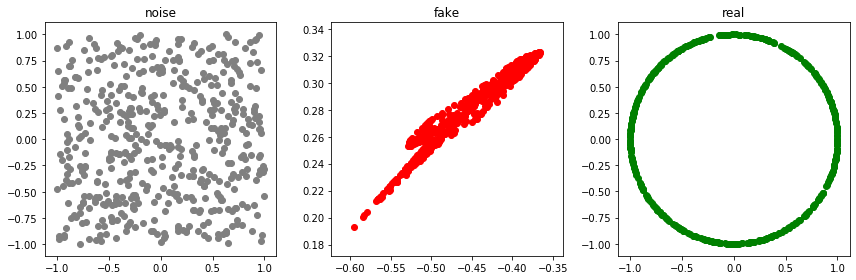

Epoch: 9800 G-error: 0.7150385975837708 D-error: 1.3785691261291504


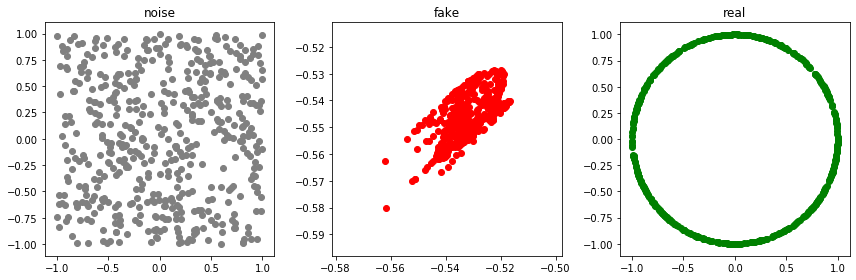

Epoch: 9900 G-error: 0.749238908290863 D-error: 1.3344955444335938


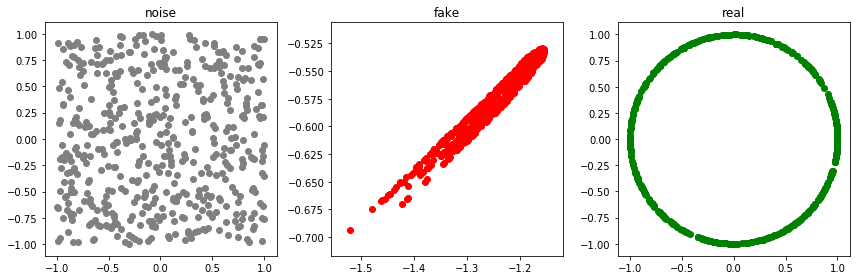

Epoch: 10000 G-error: 0.6294199824333191 D-error: 1.4620575904846191


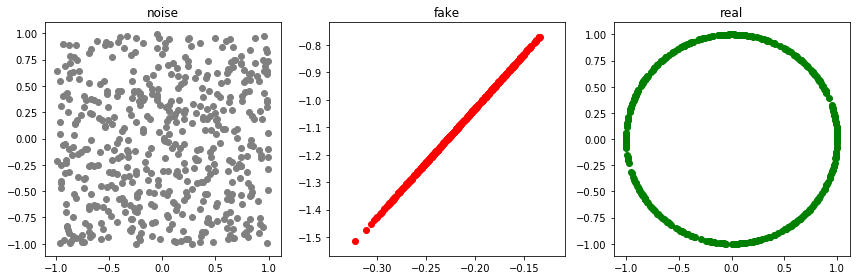

Epoch: 10100 G-error: 0.6910306215286255 D-error: 1.4037683010101318


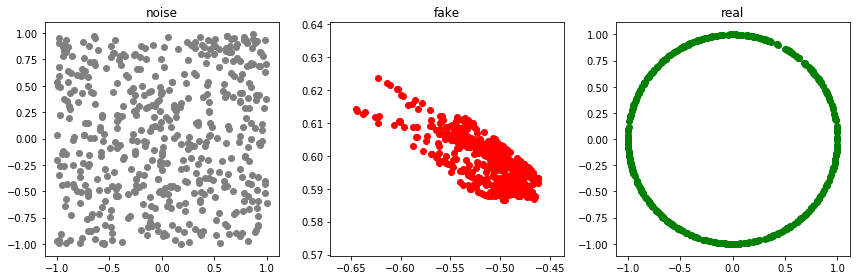

Epoch: 10200 G-error: 0.7289831042289734 D-error: 1.3719382286071777


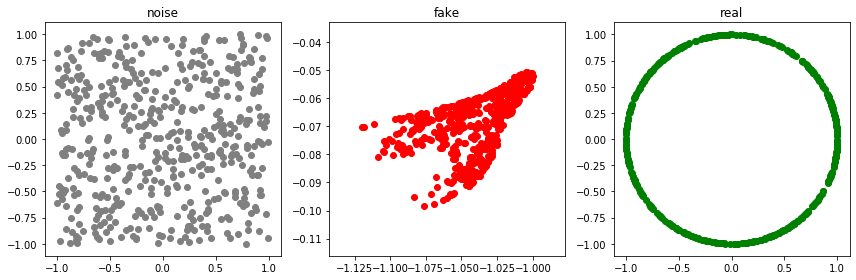

Epoch: 10300 G-error: 0.7434455156326294 D-error: 1.3523679971694946


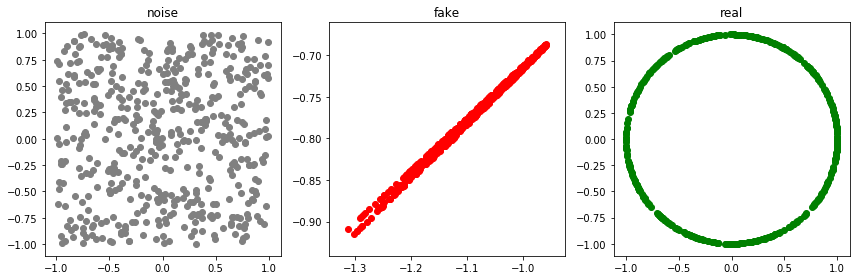

Epoch: 10400 G-error: 0.5904799699783325 D-error: 1.4899507761001587


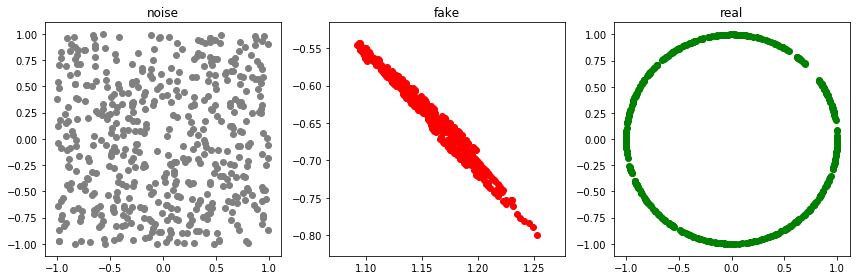

Epoch: 10500 G-error: 0.626029372215271 D-error: 1.4781713485717773


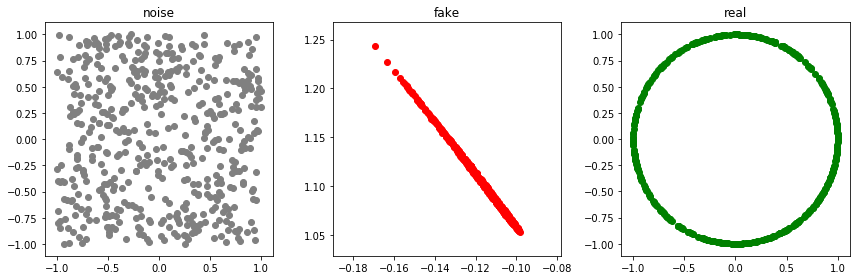

Epoch: 10600 G-error: 0.6464582085609436 D-error: 1.442117691040039


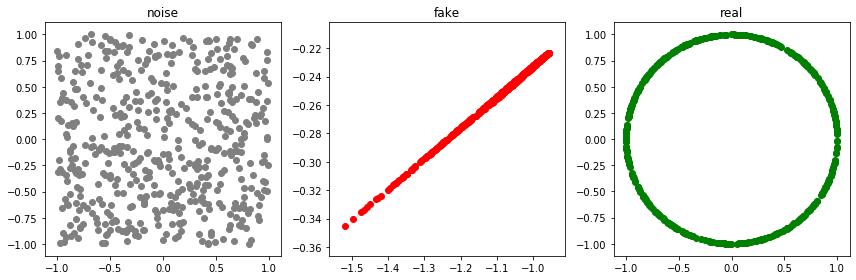

Epoch: 10700 G-error: 0.6613389849662781 D-error: 1.4165465831756592


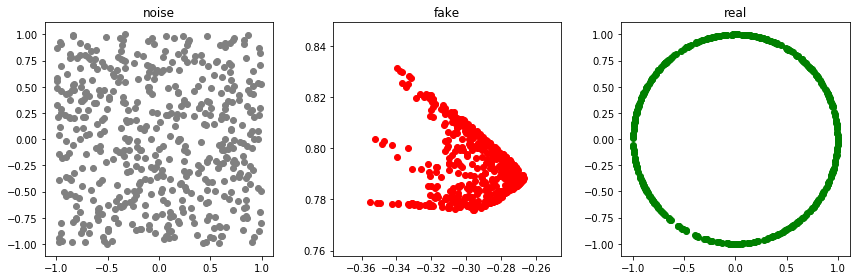

Epoch: 10800 G-error: 0.6077477335929871 D-error: 1.4770686626434326


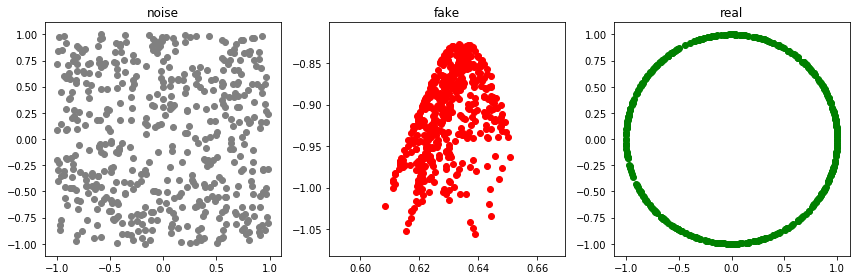

Epoch: 10900 G-error: 0.6947643756866455 D-error: 1.3969662189483643


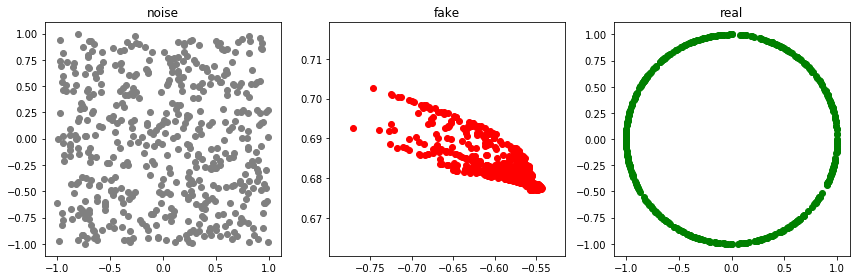

Epoch: 11000 G-error: 0.6850792169570923 D-error: 1.4271976947784424


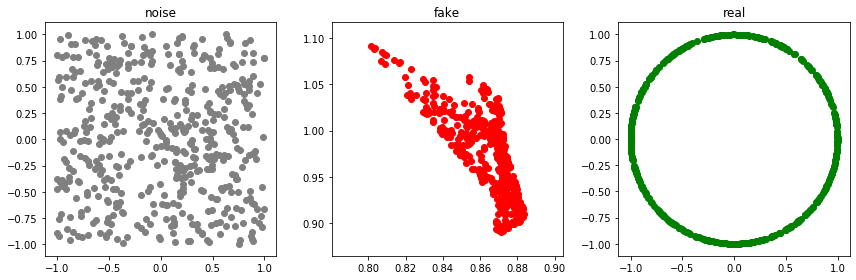

Epoch: 11100 G-error: 0.6896728873252869 D-error: 1.4155775308609009


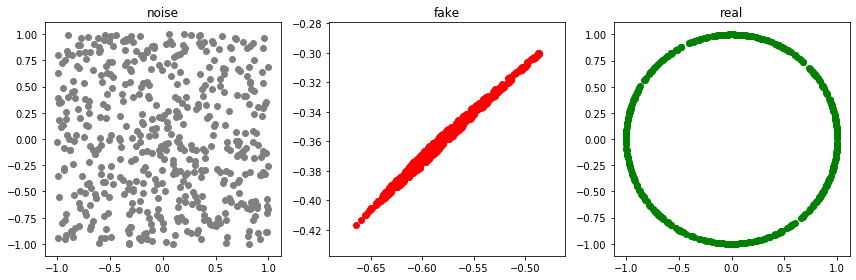

Epoch: 11200 G-error: 0.7823864817619324 D-error: 1.2929846048355103


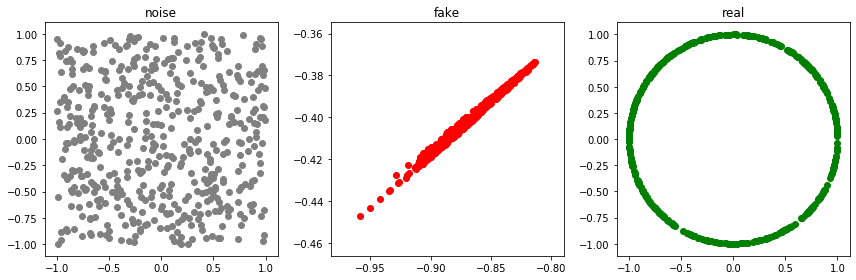

Epoch: 11300 G-error: 0.7041353583335876 D-error: 1.3720424175262451


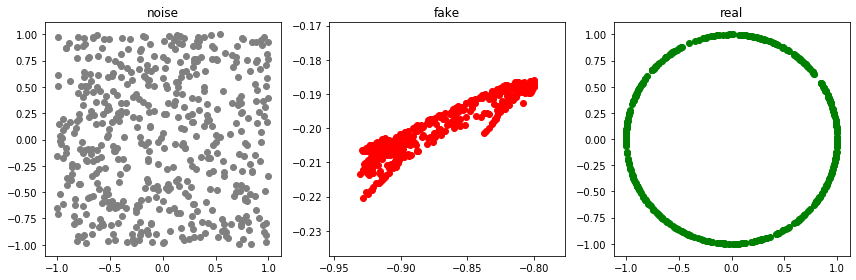

Epoch: 11400 G-error: 0.742545485496521 D-error: 1.3312127590179443


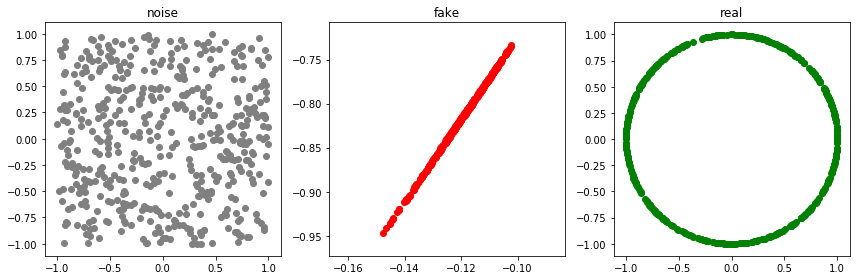

Epoch: 11500 G-error: 0.7283722758293152 D-error: 1.3568990230560303


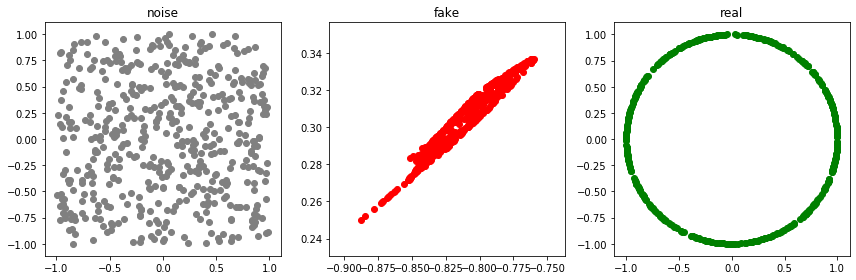

Epoch: 11600 G-error: 0.7996848821640015 D-error: 1.333141803741455


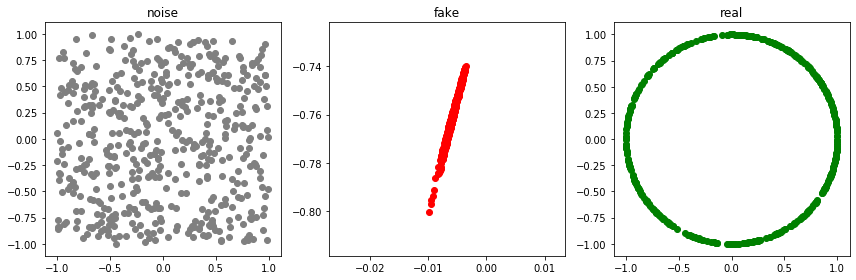

Epoch: 11700 G-error: 0.7835118174552917 D-error: 1.306349277496338


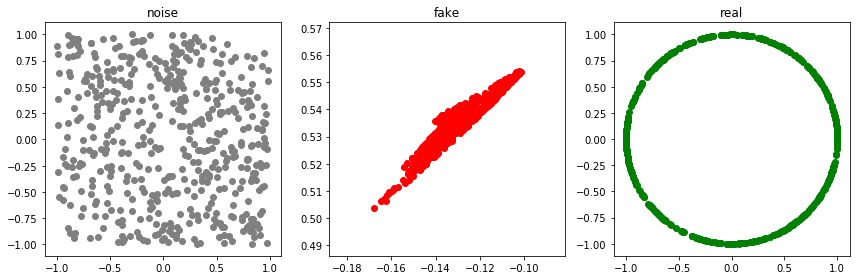

Epoch: 11800 G-error: 0.7801210880279541 D-error: 1.3133490085601807


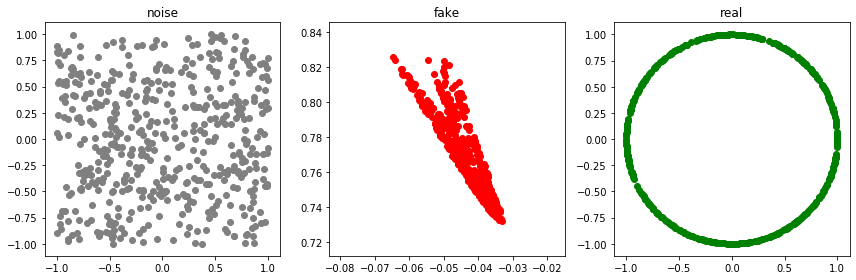

Epoch: 11900 G-error: 0.6243999600410461 D-error: 1.4660005569458008


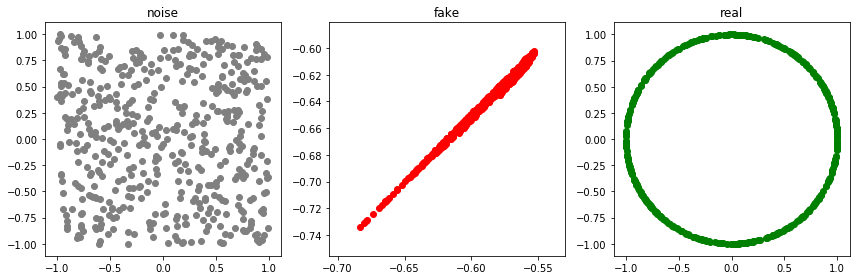

Epoch: 12000 G-error: 0.7232546806335449 D-error: 1.367140293121338


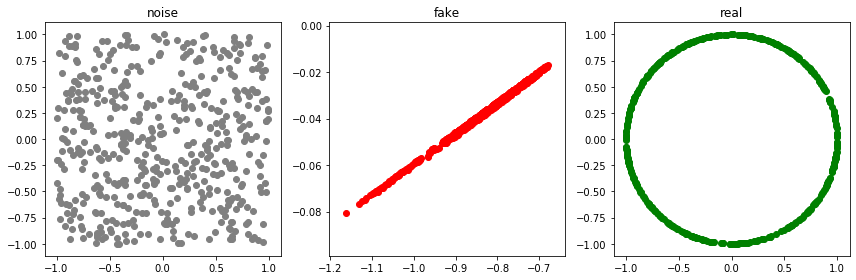

Epoch: 12100 G-error: 0.7134062647819519 D-error: 1.3934617042541504


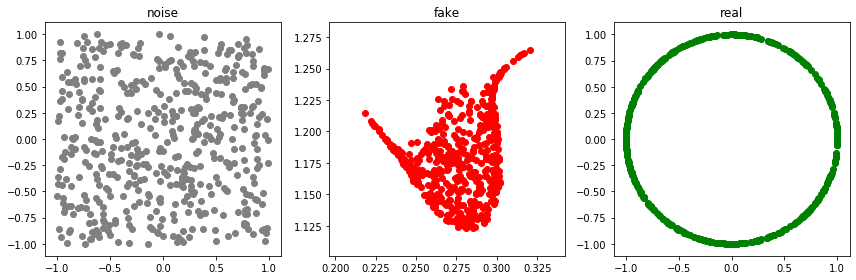

Epoch: 12200 G-error: 0.5886455774307251 D-error: 1.4912834167480469


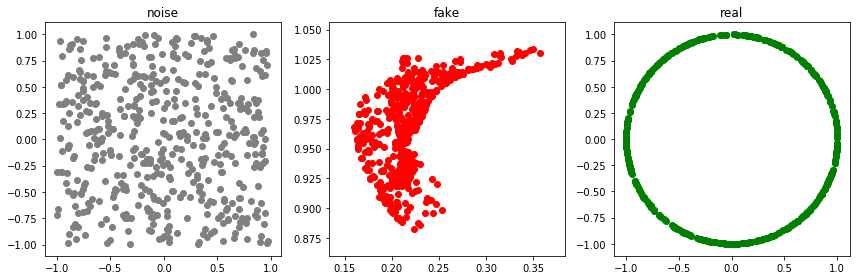

Epoch: 12300 G-error: 0.5752044320106506 D-error: 1.5218935012817383


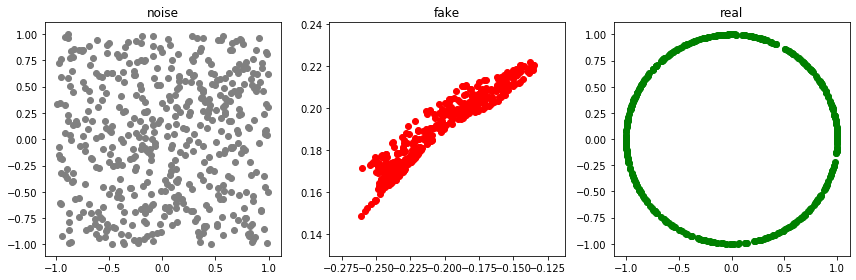

Epoch: 12400 G-error: 0.7413337826728821 D-error: 1.3310866355895996


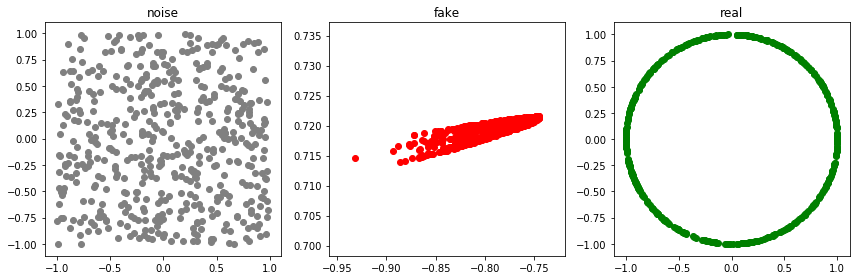

Epoch: 12500 G-error: 0.6791879534721375 D-error: 1.432919979095459


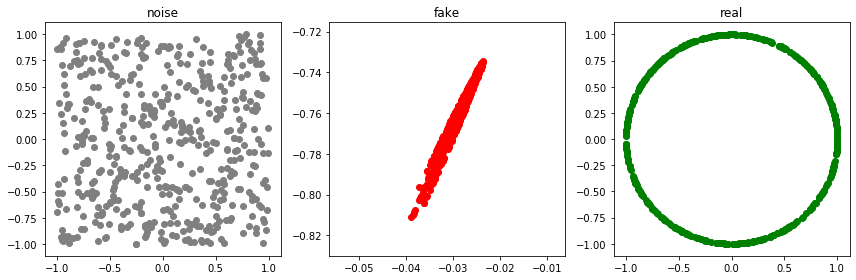

Epoch: 12600 G-error: 0.7718132138252258 D-error: 1.3150928020477295


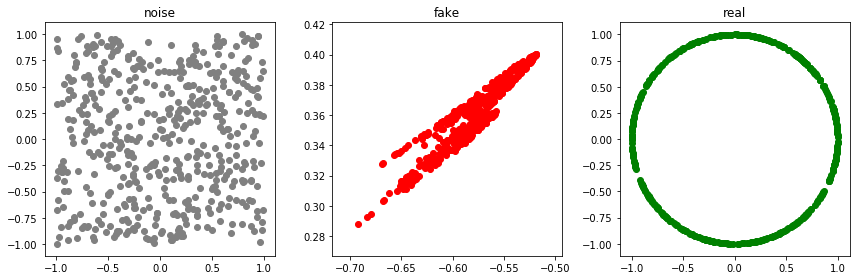

Epoch: 12700 G-error: 0.7985754609107971 D-error: 1.322779893875122


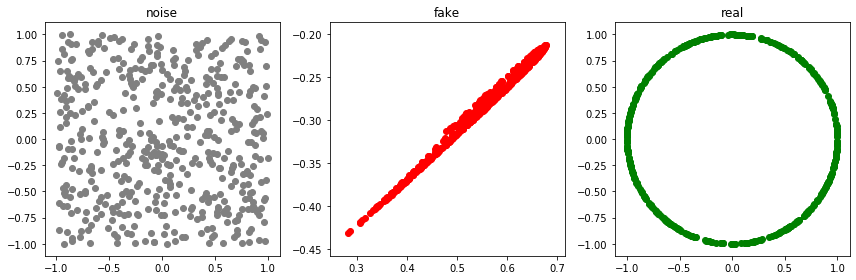

Epoch: 12800 G-error: 0.7722069025039673 D-error: 1.2787303924560547


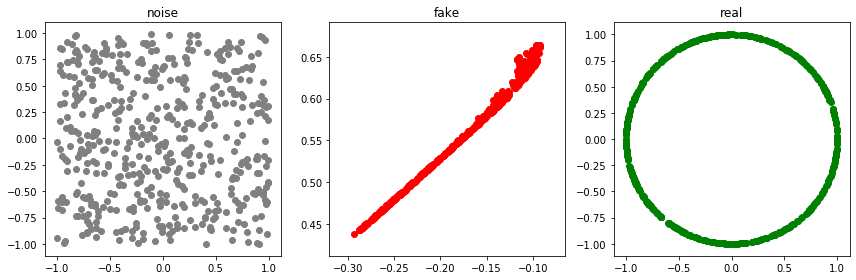

Epoch: 12900 G-error: 0.7806909084320068 D-error: 1.3263530731201172


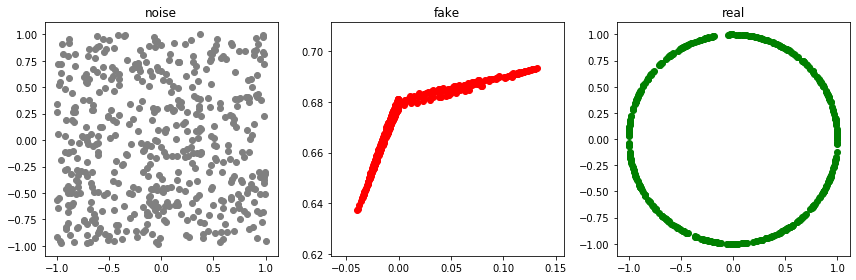

Epoch: 13000 G-error: 0.601375162601471 D-error: 1.465775966644287


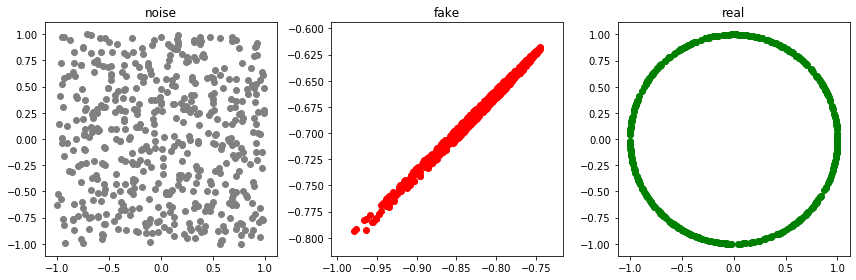

Epoch: 13100 G-error: 0.6705381870269775 D-error: 1.4060595035552979


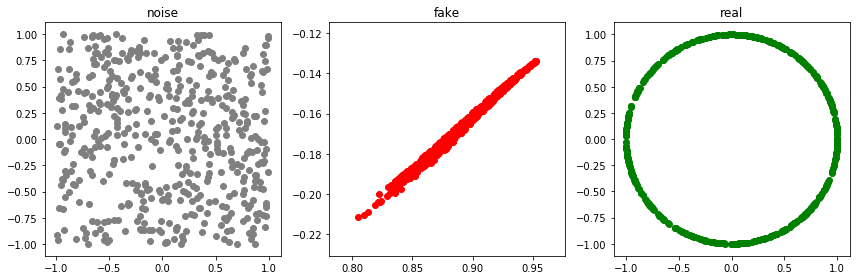

Epoch: 13200 G-error: 0.7124874591827393 D-error: 1.3797886371612549


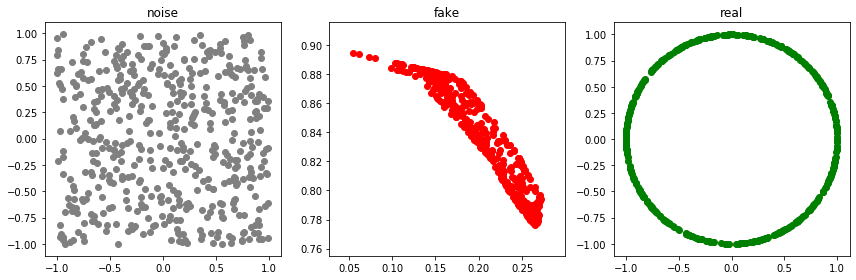

Epoch: 13300 G-error: 0.7577901482582092 D-error: 1.3495945930480957


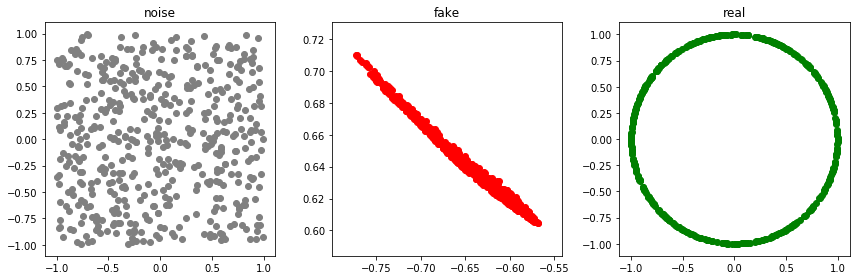

Epoch: 13400 G-error: 0.68207186460495 D-error: 1.419159173965454


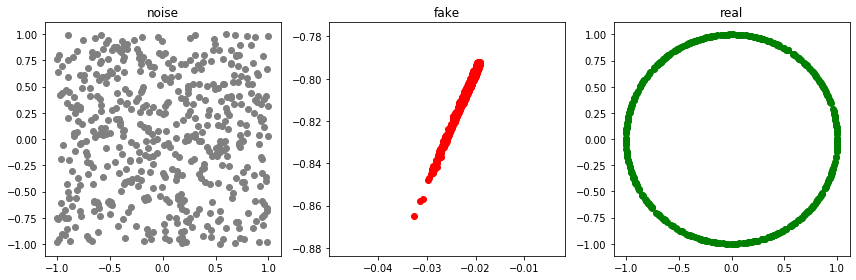

Epoch: 13500 G-error: 0.7620128989219666 D-error: 1.3208913803100586


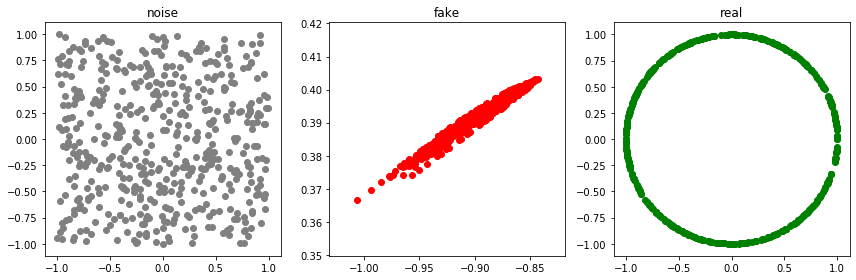

Epoch: 13600 G-error: 0.7492943406105042 D-error: 1.3704297542572021


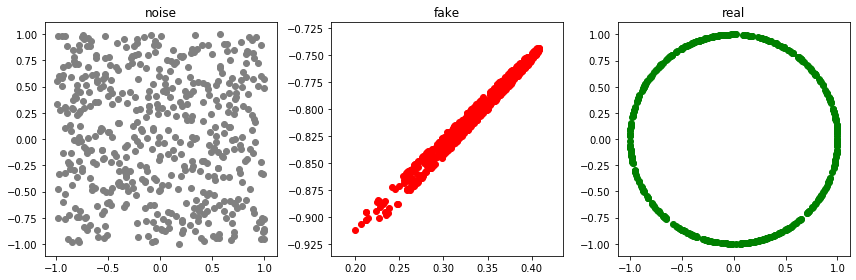

Epoch: 13700 G-error: 0.7370526194572449 D-error: 1.3553907871246338


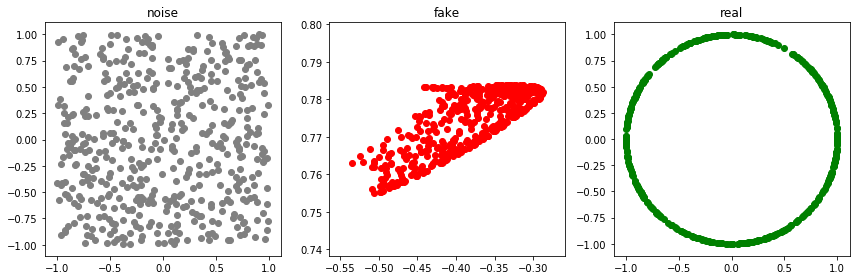

Epoch: 13800 G-error: 0.6587995290756226 D-error: 1.4161531925201416


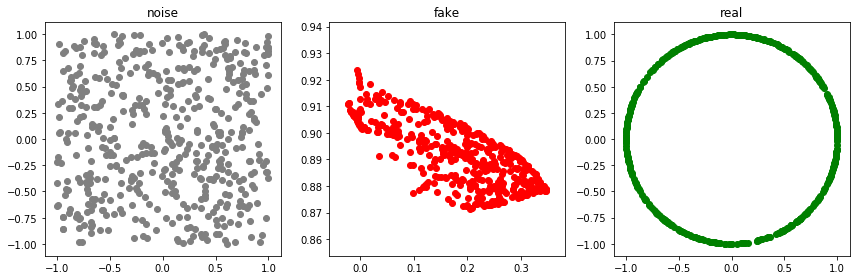

Epoch: 13900 G-error: 0.7412939071655273 D-error: 1.3588111400604248


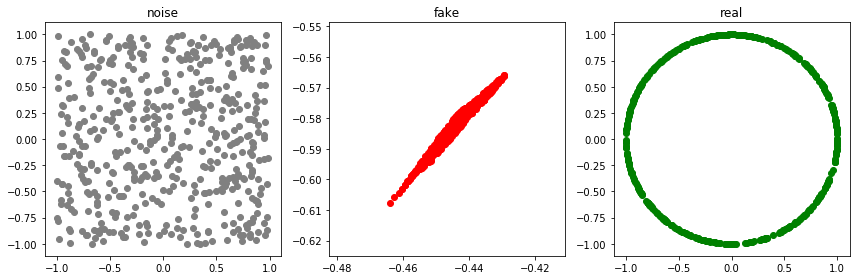

Epoch: 14000 G-error: 0.7796124219894409 D-error: 1.3093721866607666


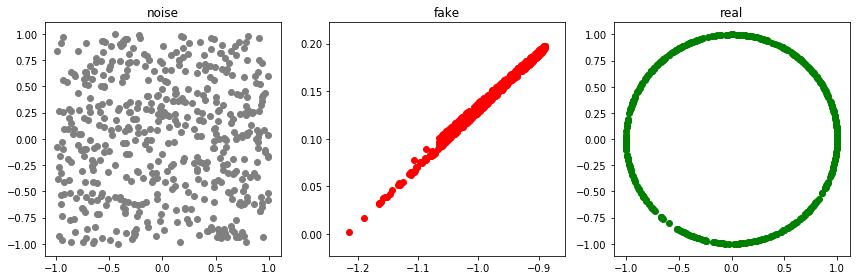

Epoch: 14100 G-error: 0.7469394207000732 D-error: 1.365492343902588


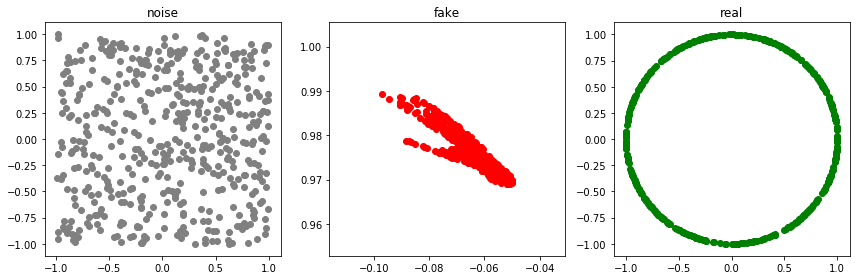

Epoch: 14200 G-error: 0.651938796043396 D-error: 1.4397964477539062


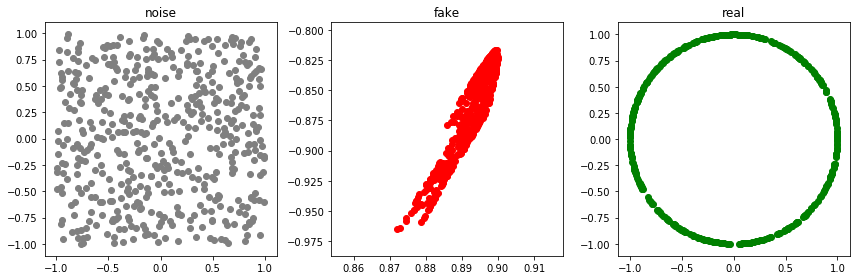

Epoch: 14300 G-error: 0.6020033359527588 D-error: 1.478165864944458


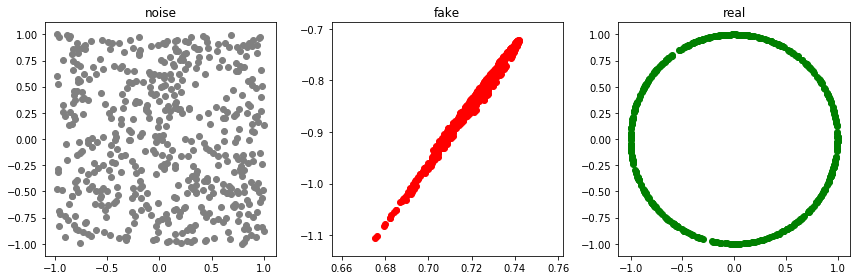

Epoch: 14400 G-error: 0.6264514923095703 D-error: 1.4643261432647705


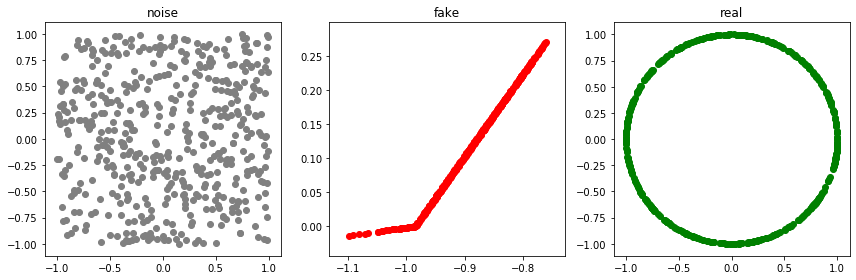

Epoch: 14500 G-error: 0.7046734690666199 D-error: 1.4210240840911865


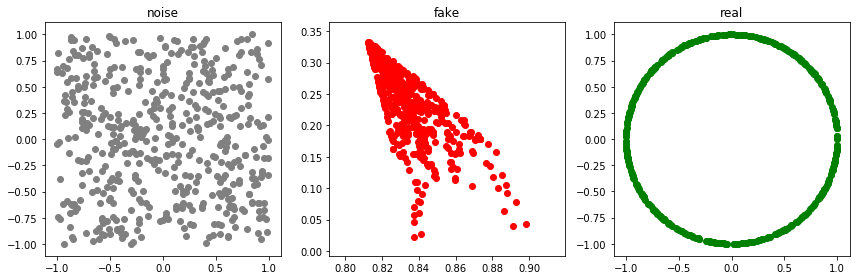

Epoch: 14600 G-error: 0.7529101967811584 D-error: 1.3331620693206787


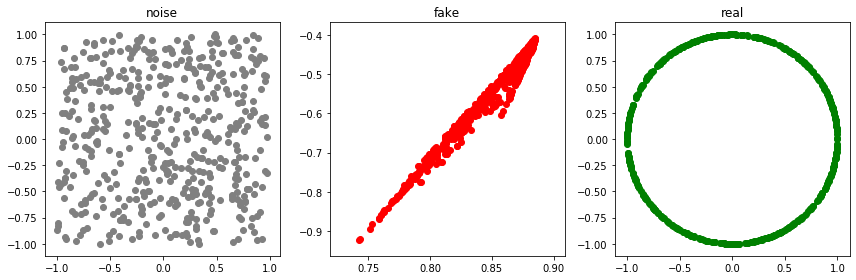

Epoch: 14700 G-error: 0.6260178089141846 D-error: 1.4680490493774414


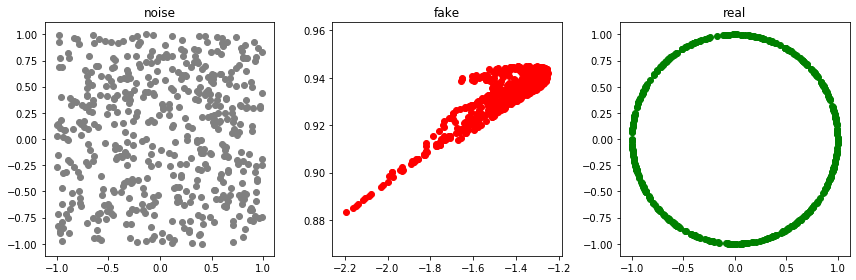

Epoch: 14800 G-error: 0.483668714761734 D-error: 1.6494245529174805


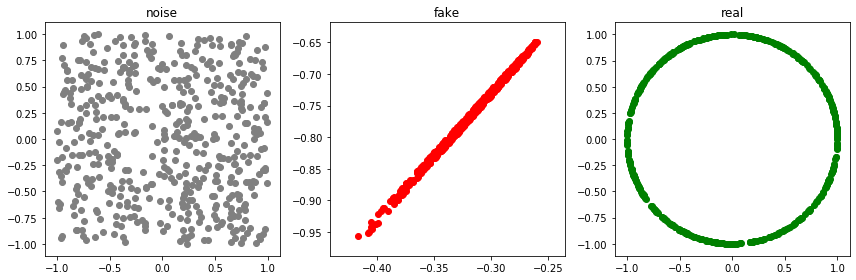

Epoch: 14900 G-error: 0.6182135939598083 D-error: 1.472743272781372


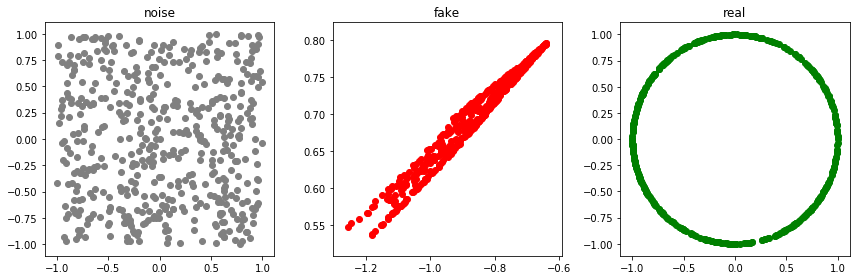

Epoch: 15000 G-error: 0.6288914680480957 D-error: 1.4576537609100342


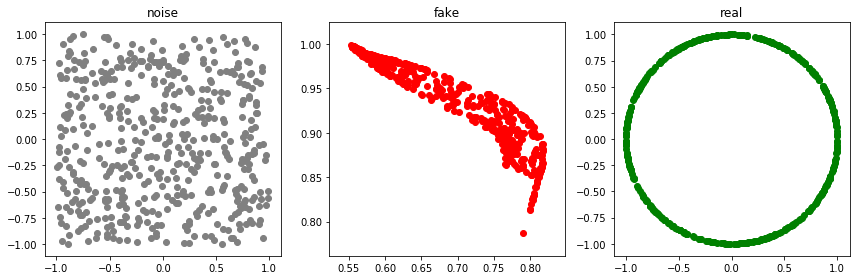

Epoch: 15100 G-error: 0.48483991622924805 D-error: 1.6139894723892212


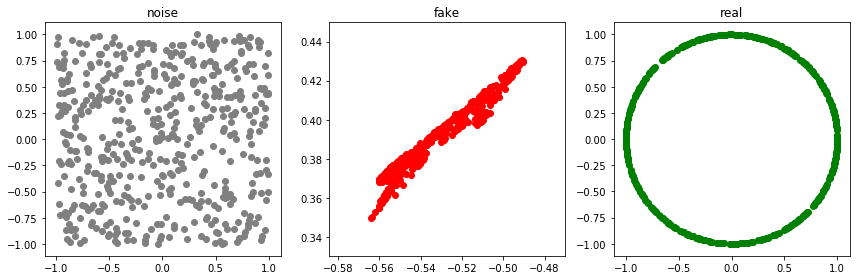

Epoch: 15200 G-error: 0.7016777992248535 D-error: 1.3659096956253052


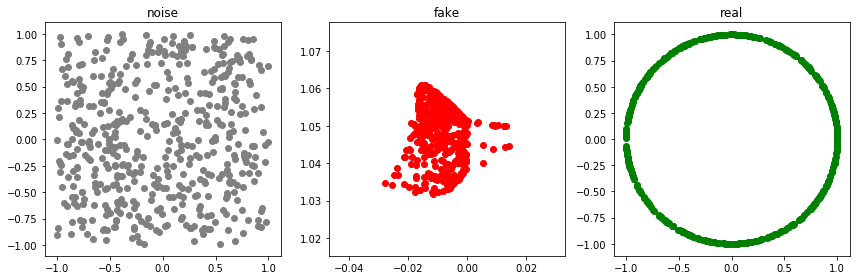

Epoch: 15300 G-error: 0.5976650714874268 D-error: 1.4843382835388184


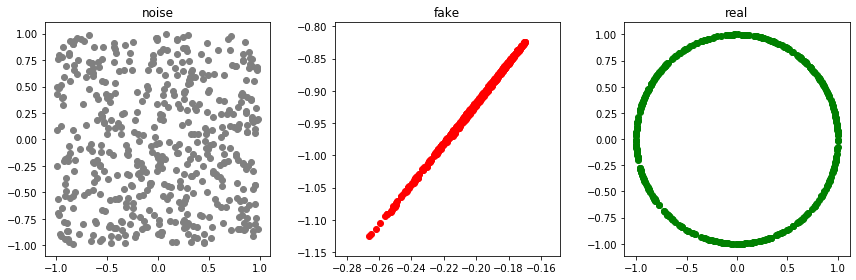

Epoch: 15400 G-error: 0.725236177444458 D-error: 1.3356549739837646


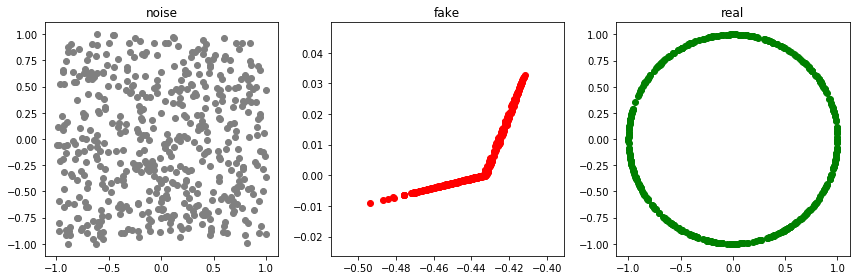

Epoch: 15500 G-error: 0.8061734437942505 D-error: 1.2825069427490234


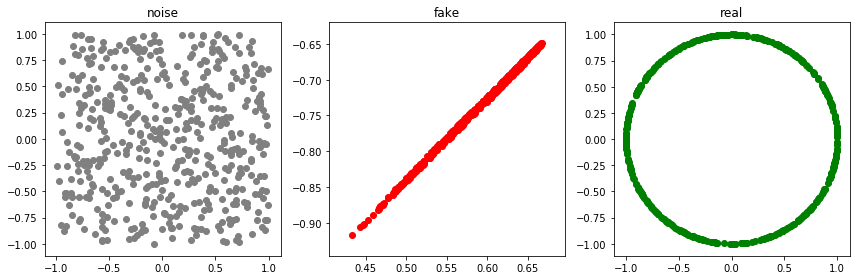

Epoch: 15600 G-error: 0.7343180775642395 D-error: 1.3532615900039673


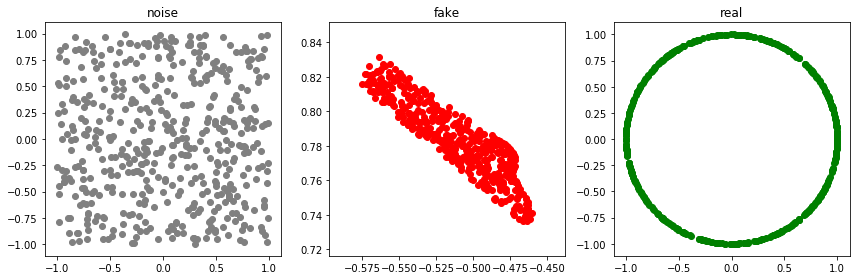

Epoch: 15700 G-error: 0.6898927688598633 D-error: 1.43827486038208


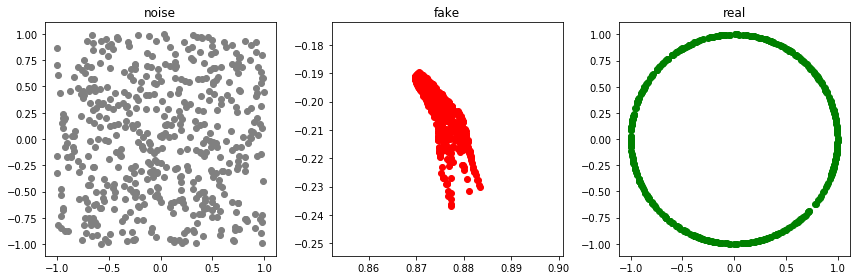

Epoch: 15800 G-error: 0.6478224396705627 D-error: 1.4314574003219604


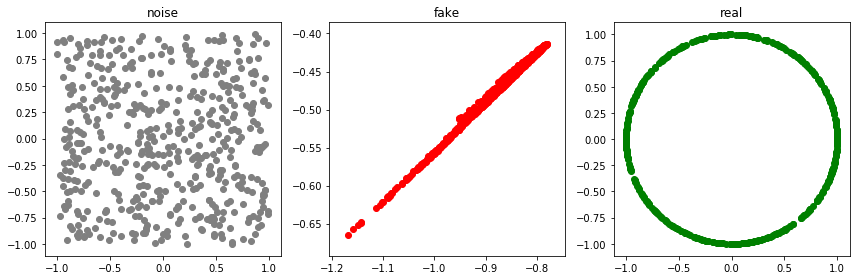

Epoch: 15900 G-error: 0.6611747145652771 D-error: 1.4220807552337646


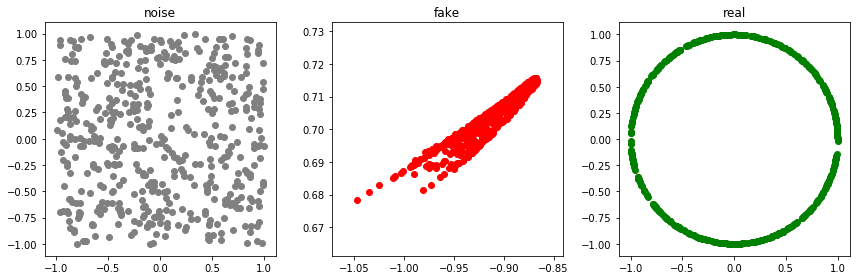

Epoch: 16000 G-error: 0.7526983022689819 D-error: 1.3643791675567627


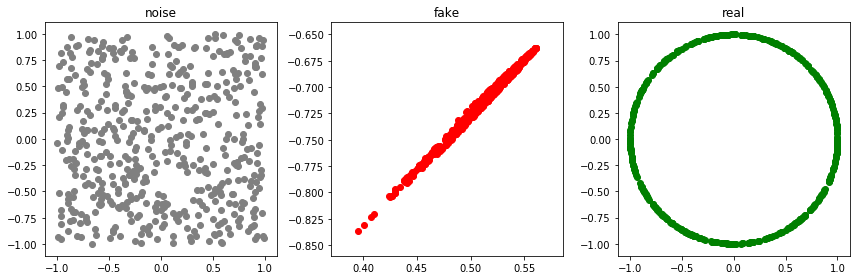

Epoch: 16100 G-error: 0.7753251791000366 D-error: 1.317463755607605


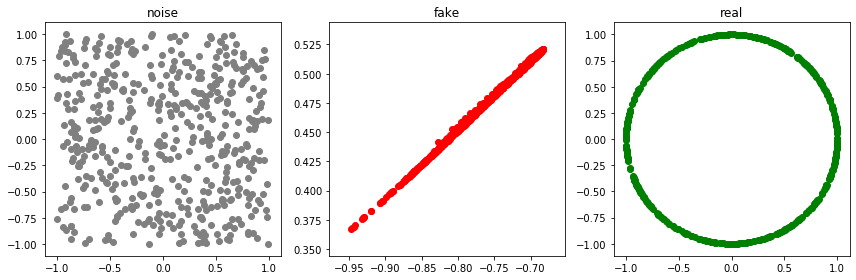

Epoch: 16200 G-error: 0.7744066715240479 D-error: 1.3519141674041748


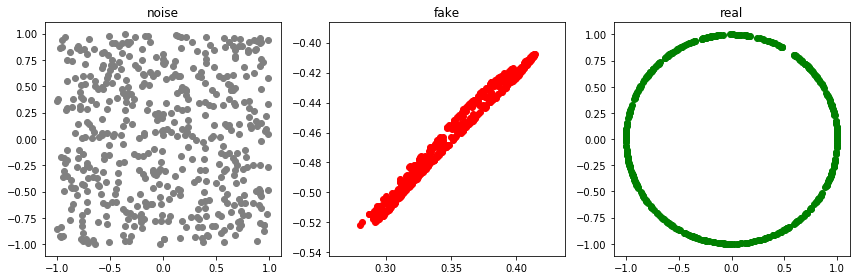

Epoch: 16300 G-error: 0.7964485883712769 D-error: 1.2688714265823364


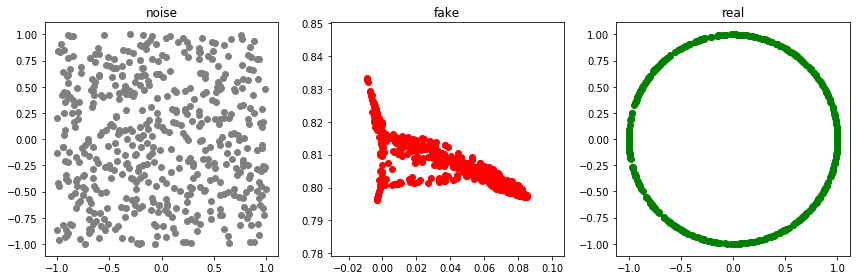

Epoch: 16400 G-error: 0.808428943157196 D-error: 1.3065590858459473


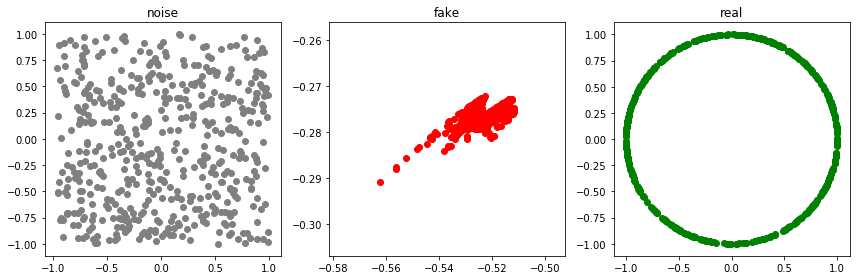

Epoch: 16500 G-error: 0.7919798493385315 D-error: 1.2763185501098633


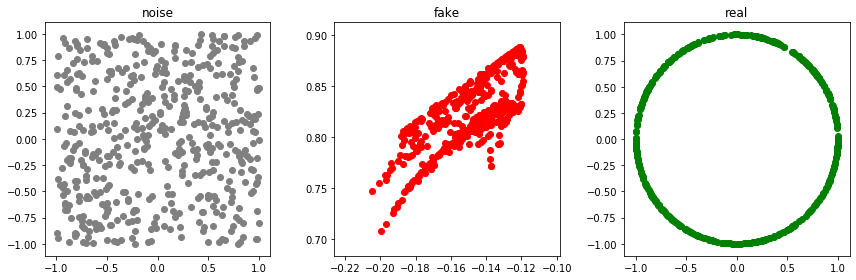

Epoch: 16600 G-error: 0.7536460757255554 D-error: 1.3291680812835693


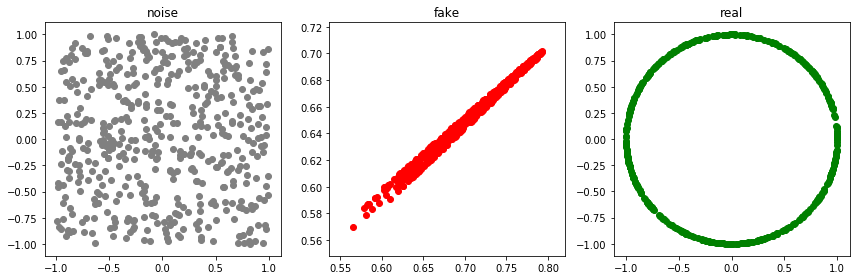

Epoch: 16700 G-error: 0.7002858519554138 D-error: 1.3971631526947021


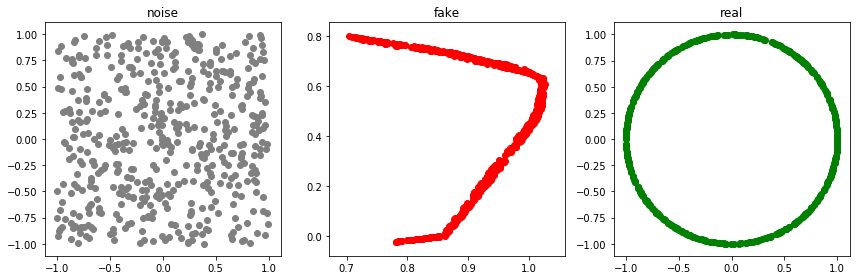

Epoch: 16800 G-error: 0.6852751970291138 D-error: 1.3418328762054443


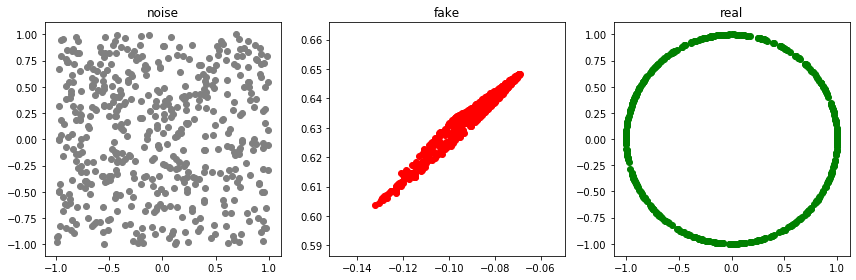

Epoch: 16900 G-error: 0.80985027551651 D-error: 1.2906835079193115


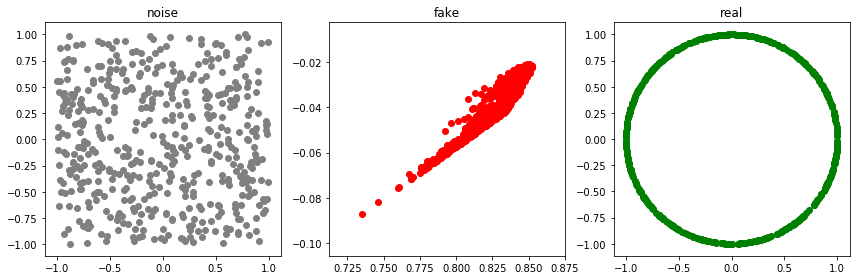

Epoch: 17000 G-error: 0.7675022482872009 D-error: 1.2944488525390625


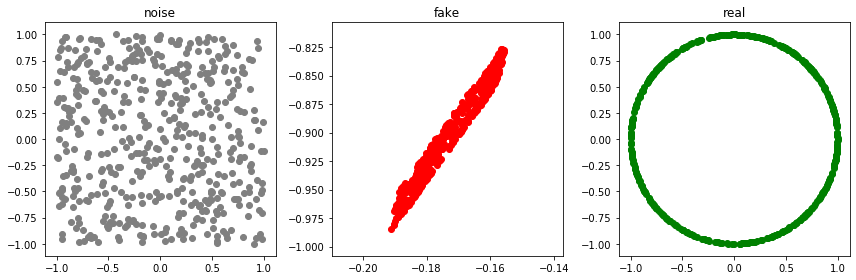

Epoch: 17100 G-error: 0.7946920394897461 D-error: 1.28409743309021


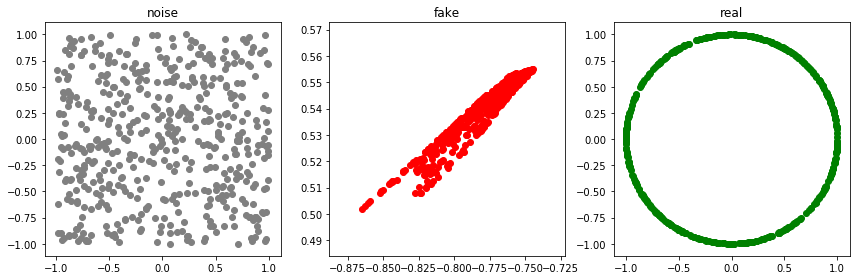

Epoch: 17200 G-error: 0.8134697079658508 D-error: 1.2954626083374023


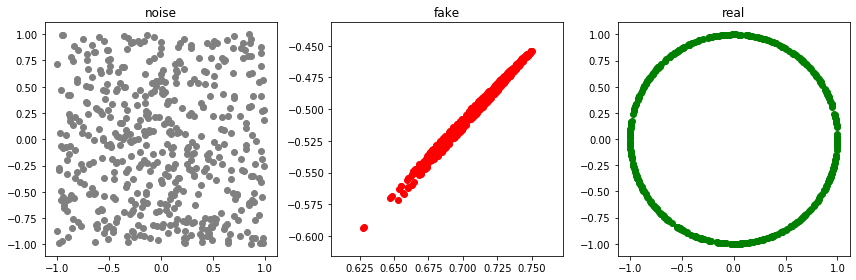

Epoch: 17300 G-error: 0.7413660883903503 D-error: 1.343102216720581


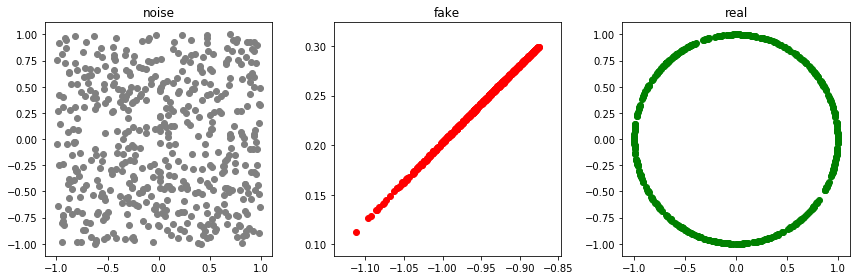

Epoch: 17400 G-error: 0.705939531326294 D-error: 1.415398359298706


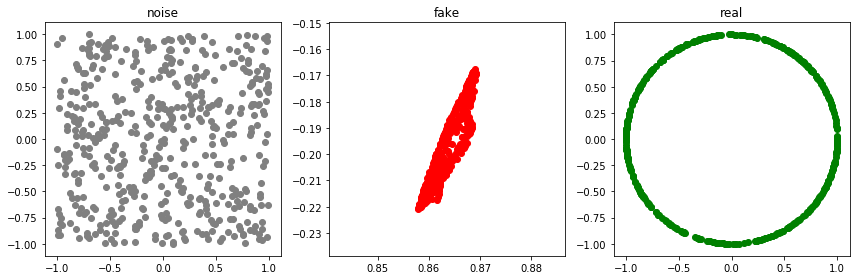

Epoch: 17500 G-error: 0.7330955266952515 D-error: 1.3453751802444458


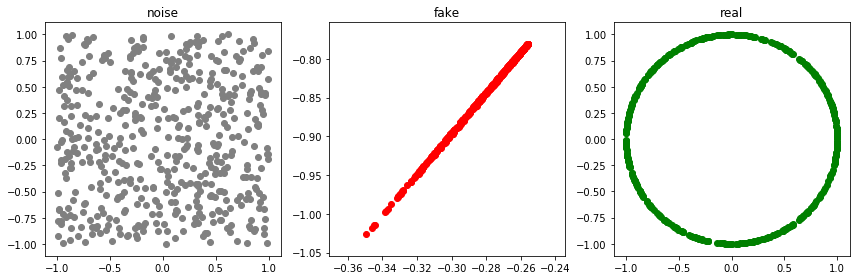

Epoch: 17600 G-error: 0.6589862108230591 D-error: 1.432863712310791


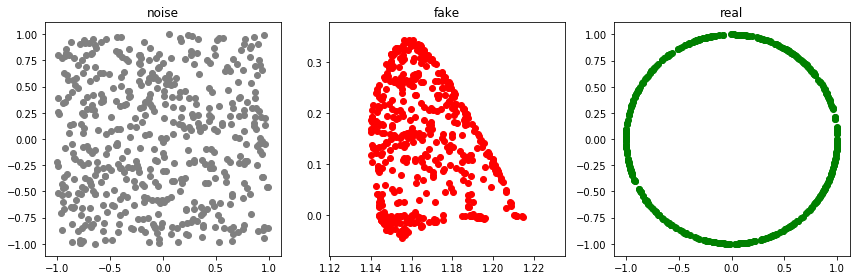

Epoch: 17700 G-error: 0.5968822240829468 D-error: 1.5007624626159668


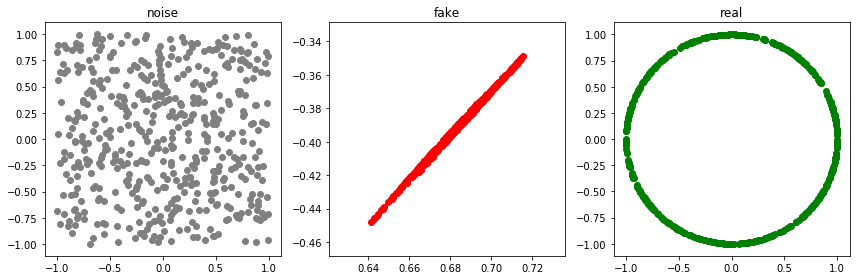

Epoch: 17800 G-error: 0.7988249063491821 D-error: 1.2564473152160645


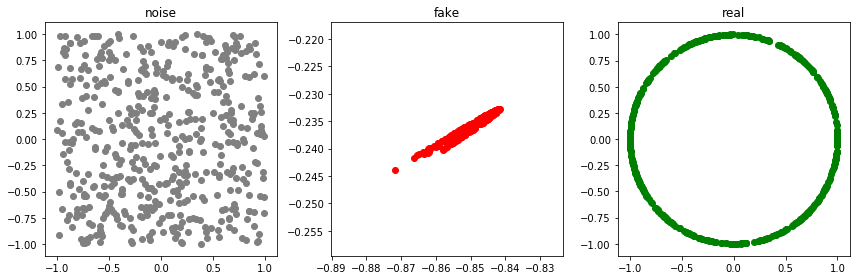

Epoch: 17900 G-error: 0.7777009606361389 D-error: 1.336634635925293


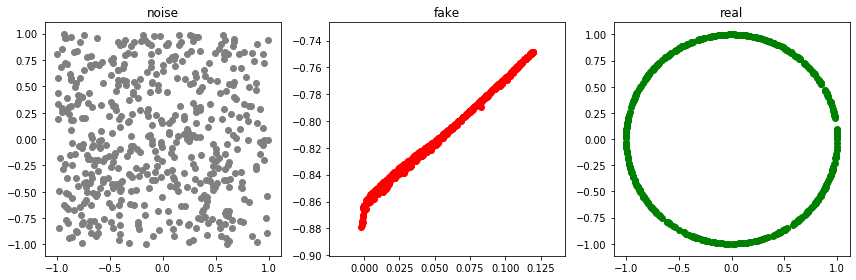

Epoch: 18000 G-error: 0.7910096049308777 D-error: 1.296874761581421


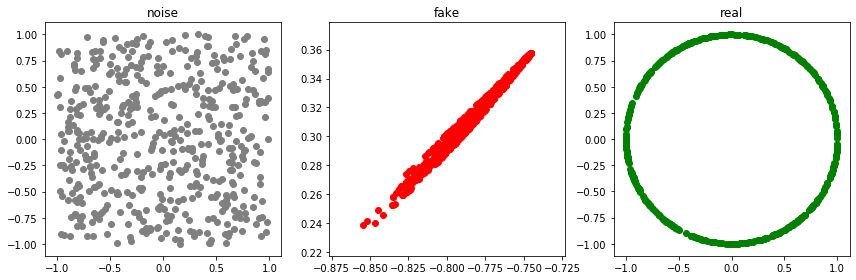

Epoch: 18100 G-error: 0.810032844543457 D-error: 1.3112173080444336


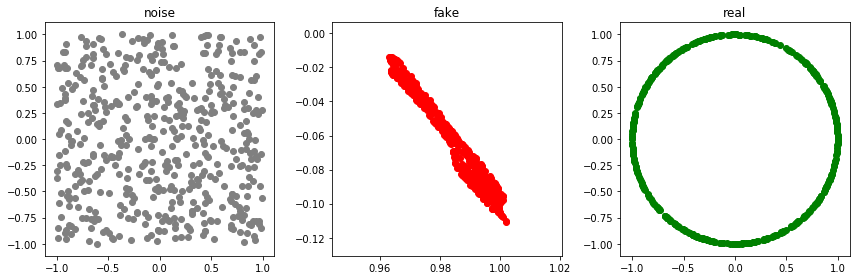

Epoch: 18200 G-error: 0.6829579472541809 D-error: 1.4067531824111938


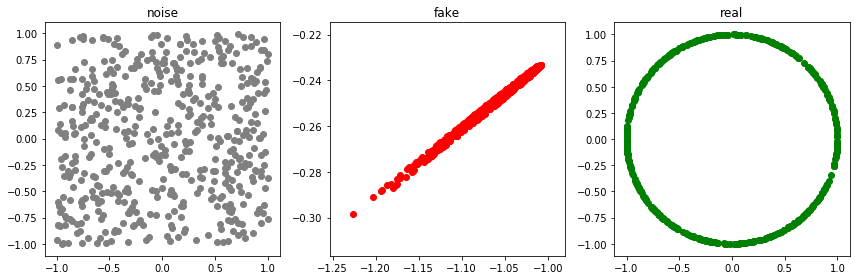

Epoch: 18300 G-error: 0.6764718890190125 D-error: 1.4161769151687622


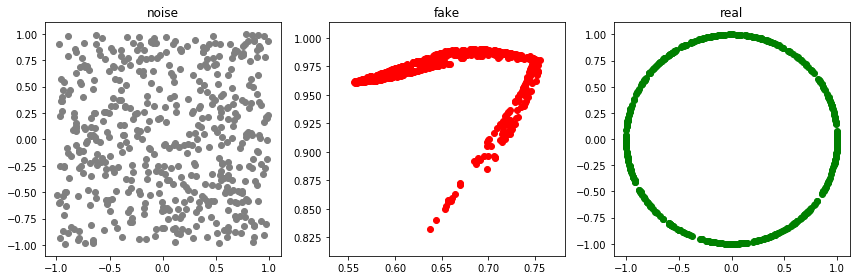

Epoch: 18400 G-error: 0.6874222159385681 D-error: 1.4019179344177246


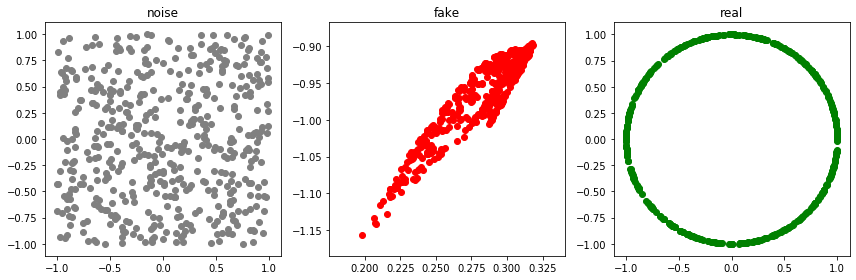

Epoch: 18500 G-error: 0.6219024062156677 D-error: 1.4648008346557617


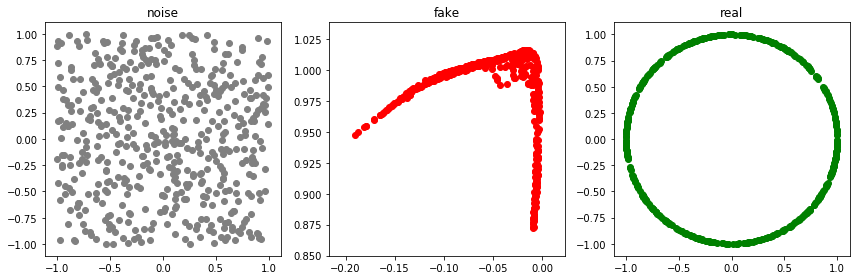

Epoch: 18600 G-error: 0.504988968372345 D-error: 1.5613000392913818


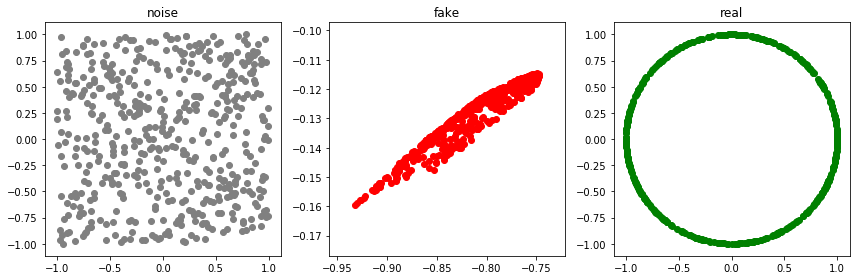

Epoch: 18700 G-error: 0.8128976821899414 D-error: 1.2661621570587158


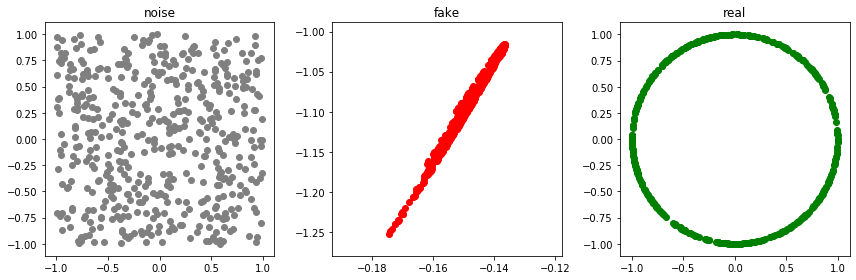

Epoch: 18800 G-error: 0.6816510558128357 D-error: 1.3918993473052979


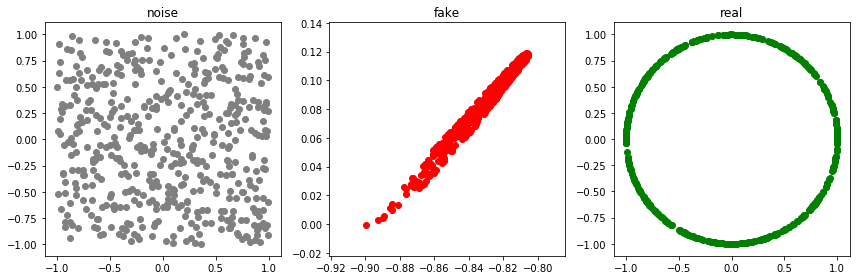

Epoch: 18900 G-error: 0.8211414217948914 D-error: 1.2772563695907593


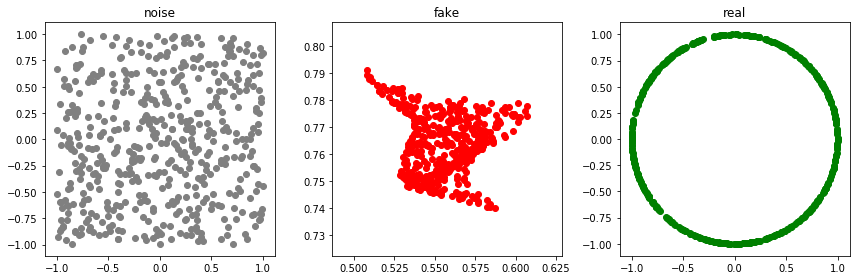

Epoch: 19000 G-error: 0.7061922550201416 D-error: 1.410235047340393


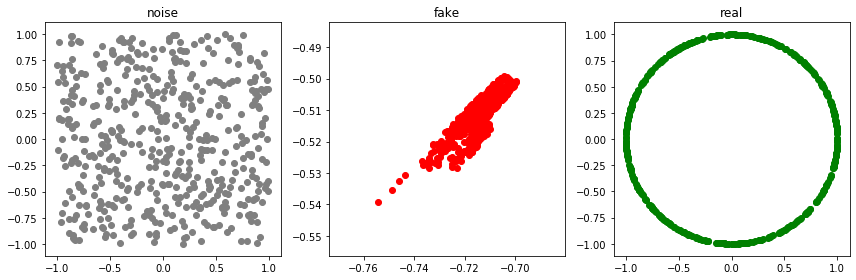

Epoch: 19100 G-error: 0.7782199382781982 D-error: 1.3178482055664062


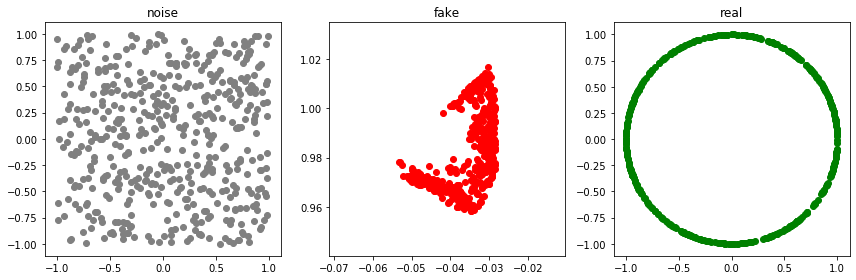

Epoch: 19200 G-error: 0.7458498477935791 D-error: 1.348296880722046


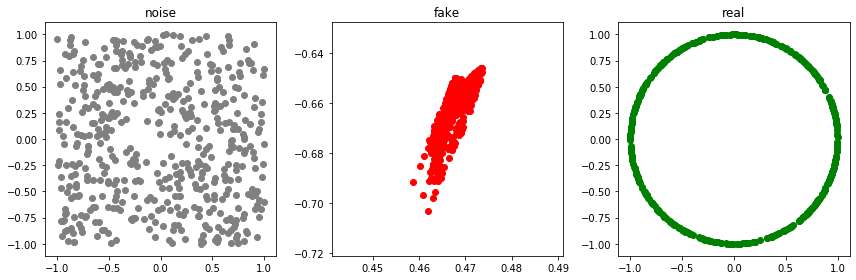

Epoch: 19300 G-error: 0.771458089351654 D-error: 1.3122978210449219


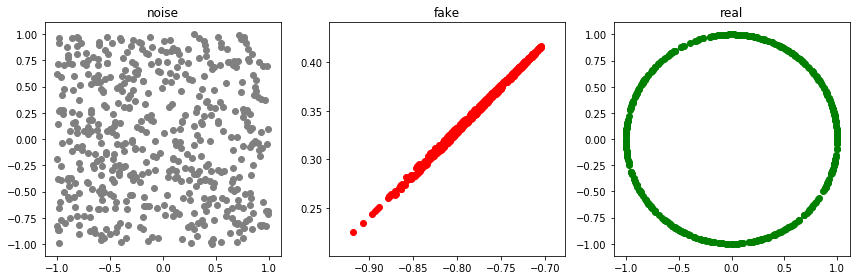

Epoch: 19400 G-error: 0.7609753608703613 D-error: 1.3673135042190552


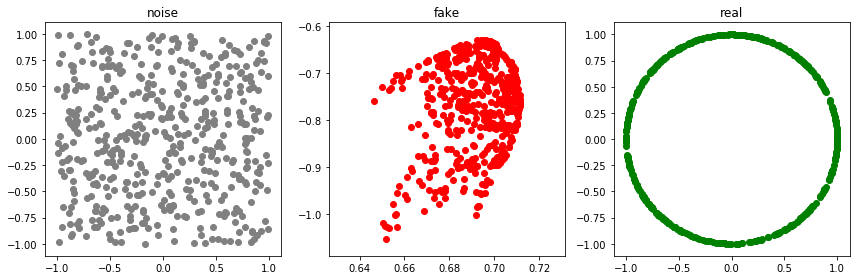

Epoch: 19500 G-error: 0.5367743968963623 D-error: 1.5643162727355957


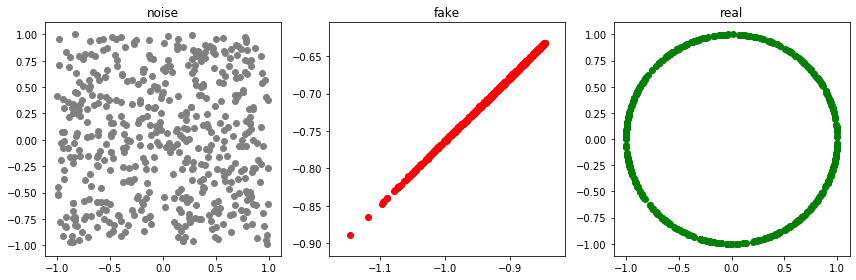

Epoch: 19600 G-error: 0.6102012395858765 D-error: 1.4808528423309326


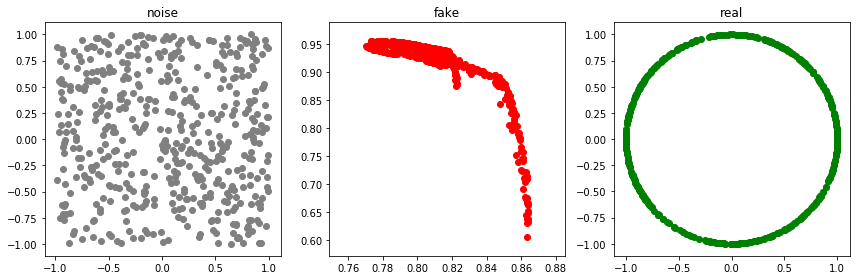

Epoch: 19700 G-error: 0.5447981953620911 D-error: 1.5409748554229736


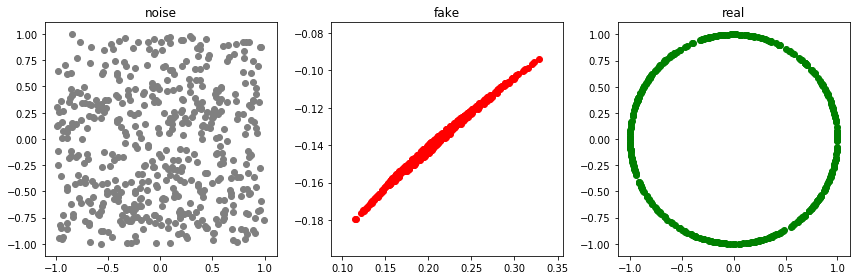

Epoch: 19800 G-error: 0.7842587232589722 D-error: 1.2610832452774048


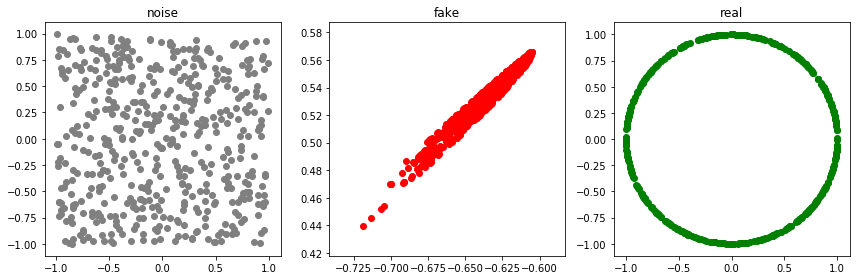

Epoch: 19900 G-error: 0.8299816250801086 D-error: 1.2820912599563599


In [12]:
num_epochs = 20000
sample_size = 500

for epoch in range(num_epochs):
    
    # real data
    angle = np.random.uniform(-np.pi,np.pi,(sample_size,1)).astype('float32')
    data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)
    real_data = t.from_numpy(data)
    
    # train discriminator:
    noise = t.empty(sample_size,2, device=device).uniform_(-1,1)
    fake_data = generator(noise)#.detach()    
    d_error = train_discriminator(d_optimizer, real_data, fake_data)
    
    # train generator       - tryu with detach and without  
    noise = t.empty(sample_size,2, device=device).uniform_(-1,1)
    fake_data = generator(noise)#.detach()    
    g_error = train_generator(g_optimizer, fake_data)
 
    
    if epoch%100 ==0:
        show(noise, fake_data, real_data)
        print(f"Epoch: {epoch} G-error: {g_error.item()} D-error: {d_error.item()}")


 batch_size = real_batch.shape[0]
        
        # 1. Train Discriminator
        real_data = real_batch
        # Generate fake data
        noise = torch.randn(batch_size, 100)
        fake_data = generator(noise).detach()
        # Train D
        d_error = train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        noise = torch.randn(batch_size, 100)
        fake_data = generator(noise)
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log error

## Final result

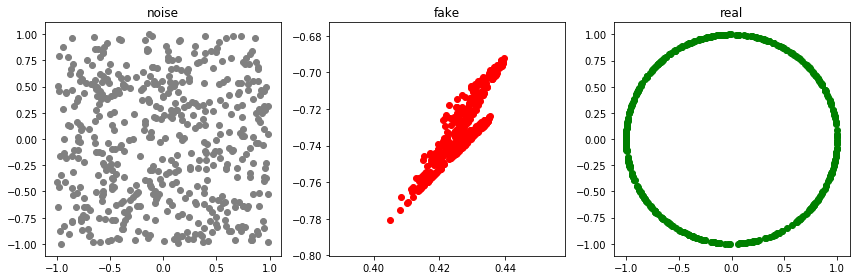

In [13]:
angle = np.random.uniform(-np.pi,np.pi,(sample_size,1)).astype('float32')
data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)
real_data = t.from_numpy(data)
    
    #fake data:
noise = t.empty(sample_size,2, device=device).uniform_(-1,1)
fake_data = generator(noise).detach()

show(noise, fake_data, real_data)

### Problem 1

Implement the GAN train loop that will train GAN to generate from the sample distribution.  

### Problem 2

Use another sampling distribution. One that is not concentrated on a line e.g. an ellipse. 